# **Eurorepo.**
Información acerca de la documentación de incidentes de ciberseguridad en los que se comprometen infraestructuras críticas. Incluye detalles sobre ataques, como el tipo de ataque (secuestro de cuentas, robo de datos), las fechas de inicio y fin, las víctimas (empresas, individuos), y enlaces a fuentes que reportan el incidente.

## Importación de librerias.

In [9841]:
# === Importación de librerías principales ===
import pandas as pd
import numpy as np
import os
import hashlib

# === Librerías de visualización ===
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# === Configuración de colores personalizados ===
denexus_colors = ['#1B2D40', '#577596', '#C7262B', '#F85C37', '#FF8250', '#4A4A4A']
denexus_palette = sns.light_palette("#1B2D40", n_colors=100, as_cmap=True)
denexus_cmap = ListedColormap(denexus_colors)

# === Configuración de pandas ===
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# === Librerías de preprocesamiento ===
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# === Librerías para conversión de países ===
import country_converter as coco

# === Librerías para aprendizaje supervisado ===
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# === Librerías para métricas de evaluación ===
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_score,
    recall_score,
)

# === Librerías adicionales ===
from tabulate import tabulate

## Importación e información del dataframe.

In [9842]:
df = pd.read_csv("data\EUROREPO.csv", index_col=0)
df.head()

,name,description,start_date,end_date,inclusion_criteria,inclusion_criteria_subcode,source_incident_detection_disclosure,incident_type,receiver_name,receiver_country,receiver_region,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,initiator_category_subcode,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attribution_it_company,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_subcode,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,casualties,sources_url,added_to_DB,updated_at
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),NATO; NORTHAM -,End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,NaN,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Not available,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,euro,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://hackread.com/fur-affinity-website-hack...,2024-08-23,2024-08-25
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,Attack on critical infrastructure target(s),NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),- NATO; NORTHAM -,Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,NaN,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Not available,NaN,NaN,NaN,0,NaN,NaN,Not available,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,euro,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://www.malwarebytes.com/blog/cybercrime/2...,2024-08-23,2024-08-23
3720,Unknown Hackers Breached McDonald’s Instagram ...,"On 21 August 2024, unknown hackers gained cont...",2024-08-21,2024-08-21,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Hijacking with Misuse,McDonald’s,United States,NATO; NORTHAM,Critical infrastructure,Food,Not available,Not available,Not available,NaN,1,20790,NaT,Not available,Not ava

In [9843]:
df.shape

(1215, 82)

In [9844]:
df.dtypes

name                         object
description                  object
start_date                   object
end_date                     object
inclusion_criteria           object
                             ...   
legal_response_indicator     object
casualties                  float64
sources_url                  object
added_to_DB                  object
updated_at                   object
Length: 82, dtype: object

In [9845]:
df.columns

Index(['name', 'description', 'start_date', 'end_date', 'inclusion_criteria', 'inclusion_criteria_subcode', 'source_incident_detection_disclosure', 'incident_type', 'receiver_name', 'receiver_country', 'receiver_region', 'receiver_category', 'receiver_category_subcode', 'initiator_name', 'initiator_country', 'initiator_category', 'initiator_category_subcode', 'number_of_attributions', 'attribution_ID', 'attribution_date', 'attribution_type', 'attribution_basis', 'attributing_actor', 'attribution_it_company', 'attributing_country', 'attributed_initiator', 'attributed_initiator_country', 'attributed_initiator_category', 'sources_attribution', 'cyber_conflict_issue', 'offline_conflict_issue', 'offline_conflict_issue_subcode', 'offline_conflict_intensity', 'offline_conflict_intensity_subcode', 'number_of_political_responses', 'political_response_date', 'political_response_type', 'political_response_type_subcode', 'political_response_country', 'political_response_actor', 'zero_days',
      

Este es un desglose de lo que trata cada columna del DataFrame.

1. **Name**: Nombre del incidente o evento relacionado.
2. **Description**: Descripción detallada del incidente o evento.
3. **Start date**: Fecha de inicio del incidente o conflicto.
4. **End date**: Fecha de finalización del incidente o conflicto (si aplica).
5. **Inclusion criteria**: Criterios utilizados para incluir el incidente en la base de datos.
6. **Inclusion criteria subcode**: Subcódigo que especifica los criterios de inclusión.
7. **Source incident detection disclosure**: Fuente de detección o divulgación del incidente.
8. **Incident type**: Tipo de incidente o ataque.
9. **Receiver name**: Nombre de la entidad que recibe o sufre el ataque.
10. **Receiver country**: País de la entidad que recibe el ataque.
11. **Receiver region**: Región geográfica del receptor del ataque.
12. **Receiver category**: Categoría de la entidad receptora del ataque.
13. **Receiver category subcode**: Subcódigo de la categoría de la entidad receptora.
14. **Initiator name**: Nombre de la entidad que inicia o perpetra el ataque.
15. **Initiator country**: País de la entidad iniciadora del ataque.
16. **Initiator category**: Categoría de la entidad iniciadora del ataque.
17. **Initiator category subcode**: Subcódigo de la categoría de la entidad iniciadora.
18. **Number of attributions**: Número de atribuciones o asignaciones del ataque a un actor.
19. **Attribution ID**: ID de la atribución del incidente.
20. **Attribution date**: Fecha en que se realizó la atribución del ataque.
21. **Attribution type**: Tipo de atribución realizada (e.g., política, técnica).
22. **Attribution basis**: Base sobre la cual se realizó la atribución (evidencia, análisis).
23. **Attributing actor**: Actor o entidad que hizo la atribución del incidente.
24. **Attribution it company**: Compañía tecnológica involucrada en la atribución del ataque.
25. **Attributing country**: País del actor que hizo la atribución del incidente.
26. **Attributed initiator**: Entidad a la que se le atribuye la autoría del ataque.
27. **Attributed initiator country**: País del iniciador atribuido.
28. **Attributed initiator category**: Categoría del iniciador atribuido.
29. **Sources attribution**: Fuentes que respaldan la atribución del ataque.
30. **Cyber conflict issue**: Temas o problemas relacionados con el conflicto cibernético.
31. **Offline conflict issue**: Temas o problemas del conflicto fuera del ciberespacio.
32. **Offline conflict issue subcode**: Subcódigo que detalla el problema de conflicto offline.
33. **Offline conflict intensity**: Intensidad del conflicto fuera del ciberespacio.
34. **Offline conflict intensity subcode**: Subcódigo para la intensidad del conflicto offline.
35. **Number of political responses**: Número de respuestas políticas al incidente.
36. **Political response date**: Fecha de la respuesta política.
37. **Political response type**: Tipo de respuesta política.
38. **Political response type subcode**: Subcódigo de la respuesta política.
39. **Political response country**: País que realizó la respuesta política.
40. **Political response actor**: Actor o entidad que realizó la respuesta política.
41. **Zero days**: Indicador de si se usó una vulnerabilidad "zero-day" (día cero) en el ataque.
42. **Zero days subcode**: Subcódigo relacionado con vulnerabilidades de día cero.
43. **MITRE initial access**: Técnica inicial de acceso según la clasificación MITRE ATT&CK.
44. **MITRE impact**: Impacto según la clasificación MITRE ATT&CK.
45. **User interaction**: Indicador de si hubo interacción con usuarios (p.ej., phishing).
46. **Has disruption**: Si el incidente provocó alguna interrupción o no.
47. **Data theft**: Indicador de si hubo robo de datos.
48. **disruption**: Detalle sobre la interrupción causada por el incidente.
49. **Hijacking**: Indicador de si hubo secuestro de sistemas o servicios.
50. **Physical effects spatial**: Efectos físicos a nivel espacial debido al incidente.
51. **Physical effects temporal**: Efectos físicos a nivel temporal causados por el incidente.
52. **Unweighted cyber intensity**: Intensidad cibernética sin ponderar.
53. **Target multiplier**: Multiplicador de objetivos afectados por el incidente.
54. **Weighted cyber intensity**: Intensidad cibernética ponderada.
55. **Impact indicator**: Indicador general del impacto del incidente.
56. **Impact indicator value**: Valor del indicador de impacto.
57. **Functional impact**: Impacto funcional causado por el incidente.
58. **Intelligence impact**: Impacto sobre la inteligencia o recolección de datos.
59. **Political impact affected entities**: Entidades afectadas por el impacto político.
60. **Political impact affected entities exact value**: Valor exacto de las entidades afectadas políticamente.
61. **Political impact third countries**: Terceros países afectados por el incidente.
62. **Political impact third countries exact value**: Valor exacto de terceros países afectados políticamente.
63. **Economic impact**: Impacto económico del incidente.
64. **Economic impact exact value**: Valor exacto del impacto económico.
65. **Economic impact currency**: Moneda utilizada para medir el impacto económico.
66. **State responsibility indicator**: Indicador de responsabilidad estatal en el incidente.
67. **IL breach indicator**: Indicador de si hubo una violación del derecho internacional.
68. **IL breach indicator subcode**: Subcódigo relacionado con la violación del derecho internacional.
69. **Evidence for sanctions indicator**: Indicador de evidencia que justifique sanciones.
70. **Number of legal responses**: Número de respuestas legales al incidente.
71. **Legal response date**: Fecha de las respuestas legales.
72. **Legal response type**: Tipo de respuesta legal.
73. **Legal response type subcode**: Subcódigo del tipo de respuesta legal.
74. **Legal response country**: País que realizó la respuesta legal.
75. **Legal response actor**: Actor o entidad que realizó la respuesta legal.
76. **Legal attribution reference**: Referencia a la atribución legal del ataque.
77. **Legal attribution reference subcode**: Subcódigo de la referencia de atribución legal.
78. **Legal Response Indicator**: Indicador de la existencia de una respuesta legal.
79. **Casualities**: Número de bajas o víctimas relacionadas con el incidente.
80. **Sources URL**: URLs o fuentes que documentan el incidente.
81. **Added to DB**: Fecha en que el incidente fue añadido a la base de datos.
82. **Updated at**: Fecha de la última actualización del registro en la base de datos.

Debemos de conocer bien esta diferencia para proseguir:
En este contexto, los términos **receiver**, **attribution**, y **attributed** se refieren a diferentes roles o aspectos dentro del ciclo de un incidente o ataque cibernético. Aquí está la explicación de cada uno:

1. **Receiver (Receptor)**:
- El **receiver** o receptor es la **entidad objetivo** del ataque. Este puede ser un país, una organización, una institución o un individuo que está en el lado que **recibe** el ataque o la amenaza cibernética.

2. **Attribution (Atribución)**:
- El término **attribution** hace referencia a la **identificación del autor o actor** que está detrás del ataque. En ciberseguridad, la atribución es el proceso de determinar quién o qué está detrás de una actividad maliciosa.

3. **Attributed (Atribuido)**:
- **Attributed** se refiere a la entidad que ha sido **acusada o identificada como responsable** del ataque. Es el actor, país, grupo o persona a quien se le asigna la responsabilidad del incidente.

**Resumen:**
- **Receiver** es quien **recibe** el ataque.
- **Attribution** es el **proceso de identificar** quién está detrás del ataque.
- **Attributed** se refiere a la **entidad acusada o identificada** como responsable del ataque.

### **Inclusion** e **Incident**.

In [9846]:
df_1 = df.filter(regex='^inclusion|incident', axis=1)
df_1

,inclusion_criteria,inclusion_criteria_subcode,source_incident_detection_disclosure,incident_type
ID,,,,
3723,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Hijacking without Misuse
3721,Attack on critical infrastructure target(s),NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
3720,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Hijacking with Misuse
3719,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Data theft; Disruption; Hijacking with Misuse;...
3717,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Disruption; Ransomware
...,...,...,...,...
959,Attack conducted by nation state (generic “sta...,NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
960,Attack conducted by non-state group / non-stat...,Attack conducted by a state-affiliated group (...,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
966,Attack conducted by non-state group / non-stat...,Attack conducted by a state-affiliated group (...,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse


In [9847]:
df_1.isnull().sum()

inclusion_criteria                        1
inclusion_criteria_subcode              959
source_incident_detection_disclosure     22
incident_type                             3
dtype: int64

In [9848]:
df.drop(['inclusion_criteria', 'inclusion_criteria_subcode'], axis=1, inplace=True)

In [9849]:
df.dropna(subset=['incident_type', 'source_incident_detection_disclosure'], inplace=True) #pocas filas con nulos.

### **Receiver.**

In [9850]:
df_1 = df.filter(regex='receiver', axis=1)
df_1

,receiver_name,receiver_country,receiver_region,receiver_category,receiver_category_subcode
ID,,,,,
3723,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),NATO; NORTHAM -,End user(s) / specially protected groups - Cri...,- Digital Provider
3721,Not available - Not available - Not available,Not available; Canada; Europe (region),- NATO; NORTHAM -,Unknown - Education - Critical infrastructure,- - Food
3720,McDonald’s,United States,NATO; NORTHAM,Critical infrastructure,Food
3719,Hoerbiger Holding,Switzerland,EUROPE; WESTEU,Critical infrastructure,Critical Manufacturing
3717,Lagoon,New Caledonia,NaN,Critical infrastructure,Telecommunications
...,...,...,...,...,...
959,None - None - None,"Russia; Egypt; Iran, Islamic Republic of",EUROPE; EASTEU; CSTO; SCO - MENA; MEA; AFRICA;...,Critical infrastructure; Critical infrastructu...,Energy; Chemicals; Defence industry; - Energy...
960,None - None - None - None - None - None - None...,United States; Brazil; China; France; Germany;...,NATO; NORTHAM - SOUTHAM - ASIA; SCS; EASIA; NE...,State institutions / political system; Critica...,; Energy; Transportation; Health; Finance; - ...
966,None - None - None,Vietnam; Japan; Middle East (region),ASIA; SCS; SEA - ASIA; SCS; NEA -,State institutions / political system; Critica...,Government / ministries; Transportation; ; ; H...


In [9851]:
df_1.isnull().sum()

receiver_name                183
receiver_country               1
receiver_region               69
receiver_category              0
receiver_category_subcode     10
dtype: int64

Optamos por eliminar la **región** ya que va a dividirse por continentes.

In [9852]:
df.drop(['receiver_region'], axis=1, inplace=True)

In [9853]:
df.dropna(subset=['receiver_country', 'receiver_category_subcode'], inplace=True) #pocas filas con nulos.

In [9854]:
df['receiver_name'].fillna('Unknown receiver', inplace=True)

### **Initiator.**

In [9855]:
df_1 = df.filter(regex='^initiator', axis=1)
df_1

,initiator_name,initiator_country,initiator_category,initiator_category_subcode
ID,,,,
3723,Not available,Not available,Not available,NaN
3721,Not available,Not available,Not available,NaN
3720,Not available,Not available,Not available,NaN
3719,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,Criminal(s)
3717,Not available,Not available,Not available,NaN
...,...,...,...,...
959,NSA/Equation Group,Unknown,Unknown - not attributed,NaN
960,APT 20,China,"Non-state actor, state-affiliation suggested",NaN
966,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ...",NaN


In [9856]:
df_1.isnull().sum()

initiator_name                108
initiator_country               1
initiator_category              1
initiator_category_subcode    731
dtype: int64

In [9857]:
df.drop(['initiator_category_subcode'], axis=1, inplace=True)

In [9858]:
df.dropna(subset=['initiator_country', 'initiator_category'], inplace=True) #pocas filas con nulos.

In [9859]:
df['initiator_name'].fillna('Unknown initiator', inplace=True)

### **Attribution** y **Attributing**.

In [9860]:
df_1 = df.filter(regex='^attribut|number_of_attributions', axis=1)
df_1

,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attribution_it_company,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category
ID,,,,,,,,,,,
3723,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3721,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3720,1,20790,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3719,1,20787,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Not available,Not available,Akira Ransomware Group/Storm-1567,Not available,Non-state-group
3717,1,20753,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
...,...,...,...,...,...,...,...,...,...,...,...
959,2,1128; 1129,2018-01-01 00:00:00; 2018-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker; Med...,NaN,NaN,NaN,NSA/Equation Group; NSA/Equation Group,Unknown; United States,Unknown - not attributed; State
960,1,1130,2019-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker,NaN,NaN,NaN,APT 20,China,"Non-state actor, state-affiliation suggested"
966,1,6582; 6582,2018-01-01 00:00:00; 2018-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker; IT-...,NaN,NaN,NaN,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ..."


In [9861]:
df_1.isnull().sum()

number_of_attributions             0
attribution_ID                     0
attribution_date                   0
attribution_type                   0
attribution_basis                  0
attributing_actor                253
attribution_it_company           286
attributing_country              251
attributed_initiator             101
attributed_initiator_country       0
attributed_initiator_category      0
dtype: int64

In [9862]:
df.drop(['attribution_it_company'], axis=1, inplace=True)

In [9863]:
df.shape

(1179, 77)

In [9864]:
df.dropna(subset=['number_of_attributions', 'attribution_ID', 'attribution_date', 'attribution_type', 'attribution_basis'], inplace=True) #pocas filas con nulos.

A continuación, se eliminan las filas en las que más del 80% de los valores en estas columnas estén vacíos, garantizando que solo se conserven las filas con suficiente información relevante. Posteriormente, para las filas restantes, se tratan los valores nulos en todas las columnas del DataFrame: en las columnas numéricas, los valores nulos se reemplazan con la mediana, mientras que en las columnas categóricas se sustituyen por la moda (el valor más frecuente). Este enfoque asegura un conjunto de datos limpio y consistente para el análisis.

In [9865]:
columns_to_check = ['attributing_actor', 'attributing_country', 'attributed_initiator']

threshold = 0.8  # Porcentaje de nulos permitido
df = df[df[columns_to_check].isnull().mean(axis=1) < threshold]

In [9866]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Si es numérica
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    else:  # Si es categórica u otro tipo
        mode_value = df[column].mode()[0]  # Primera moda
        df[column].fillna(mode_value, inplace=True)

### **Attributed**.

In [9867]:
df_1 = df.filter(regex='attributed|sources_attribution', axis=1)
df_1

,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution
ID,,,,
3723,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...
3721,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...
3720,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...
3719,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,https://www.security-incidents.de/assets/img/i...
3717,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...
...,...,...,...,...
959,NSA/Equation Group; NSA/Equation Group,Unknown; United States,Unknown - not attributed; State,https://www.zdnet.com/article/kaspersky-says-i...
960,APT 20,China,"Non-state actor, state-affiliation suggested",https://www.dragos.com/year-in-review/#section...
966,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ...",https://www2.fireeye.com/rs/848-DID-242/images...


In [9868]:
df_1.isnull().sum()

attributed_initiator             0
attributed_initiator_country     0
attributed_initiator_category    0
sources_attribution              0
dtype: int64

In [9869]:
df.dropna(subset=['attributed_initiator', 'attributed_initiator_country', 'attributed_initiator_category', 'sources_attribution'], inplace=True)

### Conflict.

In [9870]:
df_1 = df.filter(regex='conflict', axis=1)
df_1

,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode
ID,,,,,
3723,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
3721,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
3720,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
3719,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
3717,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
...,...,...,...,...,...
959,Unknown,Unknown,Russia – Ukraine; Russia – Ukraine; Russia – U...,Unknown,HIIK 5
960,Unknown,Unknown,Russia – Ukraine; Russia – Ukraine; Russia – U...,Unknown,HIIK 5
966,International power,Unknown,Russia – Ukraine; Russia – Ukraine; Russia – U...,Unknown,HIIK 5


In [9871]:
df_1.isnull().sum()

cyber_conflict_issue                  0
offline_conflict_issue                0
offline_conflict_issue_subcode        0
offline_conflict_intensity            0
offline_conflict_intensity_subcode    0
dtype: int64

### **Political Response**.

In [9872]:
df_1 = df.filter(regex='political_response', axis=1)
df_1

,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor
ID,,,,,,
3723,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
3721,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
3720,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
3719,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
3717,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
...,...,...,...,...,...,...
959,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
960,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
966,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available


In [9873]:
df_1.isnull().sum()

number_of_political_responses      0
political_response_date            0
political_response_type            0
political_response_type_subcode    0
political_response_country         0
political_response_actor           0
dtype: int64

### **Zero** y **MITRE**.

In [9874]:
df_1 = df.filter(regex='zero|MITRE', axis=1)
df_1

,zero_days,zero_days_subcode,MITRE_initial_access,MITRE_impact
ID,,,,
3723,No,One,Not available,Data Exfiltration
3721,No,One,Not available,Data Exfiltration
3720,No,One,Not available,Data Exfiltration
3719,No,One,Not available,Data Exfiltration
3717,No,One,Not available,Data Exfiltration
...,...,...,...,...
959,No,One,Not available,Data Exfiltration
960,No,One,Not available,Data Exfiltration
966,Yes,One,Not available,Data Exfiltration


In [9875]:
df_1.isnull().sum()

zero_days               0
zero_days_subcode       0
MITRE_initial_access    0
MITRE_impact            0
dtype: int64

In [9876]:
df.drop(['zero_days_subcode'], axis=1, inplace=True)

### **User interaction**, **Disruption**, **Data theft**, **Hijacking**.

In [9877]:
df_1 = df.filter(regex='user|disruption|data|hijacking', axis=1)
df_1

,user_interaction,has_disruption,data_theft,disruption,hijacking
ID,,,,,
3723,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
3721,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
3720,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
3719,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
3717,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
...,...,...,...,...,...
959,Not available,False,For private / commercial targets: non-sensitiv...,none,"Hijacking, system misuse, e.g., through data t..."
960,Not available,False,For private / commercial targets: non-sensitiv...,none,"Hijacking, system misuse, e.g., through data t..."
966,Not available,False,For private / commercial targets: non-sensitiv...,none,"Hijacking, system misuse, e.g., through data t..."


In [9878]:
df_1.describe()

,user_interaction,has_disruption,data_theft,disruption,hijacking
count,1127,1127,1127,1127,1127
unique,2,2,7,6,5
top,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
freq,1118,705,507,516,815


In [9879]:
df_1.isnull().sum()

user_interaction    0
has_disruption      0
data_theft          0
disruption          0
hijacking           0
dtype: int64

### **Physical**, **Un-Weighted** y **Target Multiplier**.

In [9880]:
df_1 = df.filter(regex='physical|weigh|target', axis=1)
df_1

,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity
ID,,,,,
3723,none,none,0,Moderate - high political importance,3.0
3721,none,none,0,Moderate - high political importance,3.0
3720,none,none,0,Moderate - high political importance,3.0
3719,none,none,0,Moderate - high political importance,3.0
3717,none,none,0,Moderate - high political importance,3.0
...,...,...,...,...,...
959,none,none,3,Moderate - high political importance,3.0
960,none,none,3,Moderate - high political importance,3.0
966,none,none,3,Moderate - high political importance,3.0


In [9881]:
df_1.describe(include='all')

,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity
count,1127,1127,1127.000000,1127,1127.000000
unique,5,5,NaN,5,NaN
top,none,none,NaN,Moderate - high political importance,NaN
freq,1106,1107,NaN,1095,NaN
mean,NaN,NaN,2.643301,NaN,2.923691
std,NaN,NaN,1.543510,NaN,1.423427
min,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,1.000000,NaN,2.000000
50%,NaN,NaN,3.000000,NaN,3.000000
75%,NaN,NaN,4.000000,NaN,4.000000


In [9882]:
df_1.isnull().sum()

physical_effects_spatial      0
physical_effects_temporal     0
unweighted_cyber_intensity    0
target_multiplier             0
weighted_cyber_intensity      0
dtype: int64

### **Impact**.

In [9883]:
df_1 = df.filter(regex='^impact|functional|intelligence', axis=1)
df_1

,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact
ID,,,,
3723,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3721,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3720,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3719,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3717,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
...,...,...,...,...
959,Low,6.0,No system interference/disruption,No data breach/exfiltration or data corruption...
960,Low,6.0,No system interference/disruption,No data breach/exfiltration or data corruption...
966,Low,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...


In [9884]:
df_1.describe(include='all')

,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact
count,1127,1127.000000,1127,1127
unique,4,NaN,6,6
top,Low,NaN,No system interference/disruption,No data breach/exfiltration or data corruption...
freq,716,NaN,792,798
mean,NaN,4.767524,NaN,NaN
std,NaN,3.374901,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN
50%,NaN,6.000000,NaN,NaN
75%,NaN,7.000000,NaN,NaN


In [9885]:
df_1.isnull().sum()

impact_indicator          0
impact_indicator_value    0
functional_impact         0
intelligence_impact       0
dtype: int64

### **Political Impact**.

In [9886]:
df_1 = df.filter(regex='political_impact', axis=1)
df_1

,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value
ID,,,,
3723,1-10,0.0,1-10,0.0
3721,1-10,0.0,1-10,0.0
3720,1-10,0.0,1-10,0.0
3719,1-10,0.0,1-10,0.0
3717,1-10,0.0,1-10,0.0
...,...,...,...,...
959,1-10,1.0,1-10,0.0
960,1-10,1.0,1-10,0.0
966,1-10,0.0,1-10,0.0


In [9887]:
df_1.isnull().sum()

political_impact_affected_entities                0
political_impact_affected_entities_exact_value    0
political_impact_third_countries                  0
political_impact_third_countries_exact_value      0
dtype: int64

### **Economic**, **State Responsability**, **IL**, **Evidence**.

In [9888]:
df_1 = df.filter(regex='economic|IL|evidence|state', axis=1)
df_1

,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator
ID,,,,,,,
3723,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
3721,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
3720,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
3719,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
3717,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
...,...,...,...,...,...,...,...
959,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
960,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
966,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available


In [9889]:
df_1.isnull().sum()

economic_impact                     0
economic_impact_exact_value         0
economic_impact_currency            0
state_responsibility_indicator      0
IL_breach_indicator                 0
IL_breach_indicator_subcode         0
evidence_for_sanctions_indicator    0
dtype: int64

In [9890]:
df_1.describe(include='all')

,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator
count,1127,1.127000e+03,1127,1127,1127,1127,1127
unique,3,NaN,2,4,64,52,3
top,Not available,NaN,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
freq,1103,NaN,1088,768,616,836,1125
mean,NaN,1.633957e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,2.743070e+07,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN


### **Legal**.

In [9891]:
df_1 = df.filter(regex='legal', axis=1)
df_1

,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator
ID,,,,,,,,,
3723,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3721,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3720,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3719,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3717,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
...,...,...,...,...,...,...,...,...,...
959,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
960,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
966,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...


In [9892]:
df_1.isnull().sum()

number_of_legal_responses              0
legal_response_date                    0
legal_response_type                    0
legal_response_type_subcode            0
legal_response_country                 0
legal_response_actor                   0
legal_attribution_reference            0
legal_attribution_reference_subcode    0
legal_response_indicator               0
dtype: int64

In [9893]:
df_1.describe(include='all')

,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator
count,1127.000000,1127,1127,1127,1127,1127,1127,1127,1127
unique,NaN,111,13,8,43,77,11,5,4
top,NaN,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
freq,NaN,997,987,1116,988,1028,1095,1123,941
mean,0.137533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.408265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Resto de columnas.

In [9894]:
df_1 = df.iloc[:, -4:]
df_1

,casualties,sources_url,added_to_DB,updated_at
ID,,,,
3723,NaN,https://hackread.com/fur-affinity-website-hack...,2024-08-23,2024-08-25
3721,NaN,https://www.malwarebytes.com/blog/cybercrime/2...,2024-08-23,2024-08-23
3720,NaN,https://www.finansgundem.com/haber/hackerlar-m...,2024-08-23,2024-08-23
3719,NaN,https://www.inside-it.ch/schweizer-industrieko...,2024-08-23,2024-08-23
3717,NaN,https://www.zataz.com/cyberattaque-en-caledoni...,2024-08-22,2024-08-22
...,...,...,...,...
959,NaN,https://securelist.com/darkpulsar/88199/https:...,2022-08-15,2022-11-02
960,NaN,https://resources.fox-it.com/rs/170-CAK-271/im...,2022-08-15,2023-03-13
966,NaN,https://www2.fireeye.com/rs/848-DID-242/images...,2022-08-15,2023-02-08


In [9895]:
df_1.isnull().sum()

casualties     1127
sources_url       0
added_to_DB       0
updated_at        0
dtype: int64

In [9896]:
df.dropna(subset=['sources_url'], inplace=True) #pocas filas con nulos.

Eliminamos estas ya que una de ellas tiene todo valores nulos. En el caso de las otras, son fechas que no interesan y no proporcionan información relevante.

In [9897]:
df.drop(['added_to_DB','casualties', 'updated_at'], axis=1, inplace=True)

In [9898]:
df.head()

,name,description,start_date,end_date,source_incident_detection_disclosure,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,Incident disclosed by victim,Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,https://hackread.com/fur-affinity-website-hack...
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No d

## Limpieza de datos.

**Extracción correcta de las URLs.**

In [9899]:
urls = ['sources_url', 'sources_attribution']

In [9900]:
for i in urls:
    df[i] = df[i].str.extract(r'(?<=//)(.*?)(?=/)')
    df[i] = df[i].str.replace(r'^www\.', '', regex=True)
    df[i] = df[i].str.replace(r'\.[a-z]{2,3}$', '', regex=True)

### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [9901]:
df.duplicated().sum() # Columnas duplicadas

0

In [9902]:
df.drop_duplicates(inplace = True)

In [9903]:
df.shape

(1127, 73)

### Manejo de valores nulos.


In [9904]:
df.isnull().sum()[df.isnull().sum() > 0] # Columnas con nulos.

sources_attribution    1
dtype: int64

In [9905]:
df.dropna(inplace = True)

### Selección de variables categóricas y continuas.
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [9906]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if len(df[i].unique()) > 25:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: name, description, start_date, end_date, incident_type, receiver_name, receiver_country, receiver_category, receiver_category_subcode, initiator_name, initiator_country, initiator_category, attribution_ID, attribution_date, attribution_type, attribution_basis, attributing_actor, attributing_country, attributed_initiator, attributed_initiator_country, attributed_initiator_category, sources_attribution, cyber_conflict_issue, offline_conflict_issue, offline_conflict_issue_subcode, political_response_date, political_response_type_subcode, political_response_country, political_response_actor, MITRE_initial_access, MITRE_impact, political_impact_affected_entities_exact_value, economic_impact_exact_value, IL_breach_indicator, IL_breach_indicator_subcode, legal_response_date, legal_response_country, legal_response_actor, sources_url
Variables categóricas: source_incident_detection_disclosure, number_of_attributions, offline_conflict_intensity, offline_conflict_intensity_su

#### Tratamiento de variables categóricas.
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [9907]:
df[v_categoricas].nunique()

source_incident_detection_disclosure            25
number_of_attributions                           9
offline_conflict_intensity                       4
offline_conflict_intensity_subcode               5
number_of_political_responses                    8
political_response_type                         25
zero_days                                        5
user_interaction                                 2
has_disruption                                   2
data_theft                                       7
disruption                                       6
hijacking                                        5
physical_effects_spatial                         5
physical_effects_temporal                        5
unweighted_cyber_intensity                       8
target_multiplier                                5
weighted_cyber_intensity                        11
impact_indicator                                 4
impact_indicator_value                          15
functional_impact              

In [9908]:
# Filtrar variables categoricas que son de tipo object.
categoricas_object = [col for col in v_categoricas if df[col].dtype == 'object']

df[categoricas_object].nunique()

source_incident_detection_disclosure    25
offline_conflict_intensity               4
offline_conflict_intensity_subcode       5
political_response_type                 25
zero_days                                5
user_interaction                         2
data_theft                               7
disruption                               6
hijacking                                5
physical_effects_spatial                 5
physical_effects_temporal                5
target_multiplier                        5
impact_indicator                         4
functional_impact                        6
intelligence_impact                      6
political_impact_affected_entities       6
political_impact_third_countries         4
economic_impact                          3
economic_impact_currency                 2
state_responsibility_indicator           4
evidence_for_sanctions_indicator         3
legal_response_type                     13
legal_response_type_subcode              8
legal_attri

##### **Source Incident Detection Disclosure.**

In [9909]:
df['source_incident_detection_disclosure'].unique()

array(['Incident disclosed by victim',
       'Incident disclosed by IT-security company',
       'Incident disclosed by attacker',
       'Incident disclosed by media (without further information on source); Incident disclosed by authorities of victim state',
       'Incident disclosed by media (without further information on source)',
       'Incident disclosed by authorities of victim state',
       'Incident disclosed by third-party-actor (e.g., Citizen Lab, Amnesty International, whistleblowers) or authorities of another state',
       'Incident disclosed by media (without further information on source); Incident disclosed by victim',
       'Incident disclosed by media (without further information on source); Incident disclosed by attacker',
       'Incident disclosed by victim; Incident disclosed by attacker',
       'Incident disclosed by victim; Incident disclosed by authorities of victim state',
       'Incident disclosed by victim; Incident disclosed by IT-security company',

In [9910]:
df['source_incident_detection_disclosure'].nunique()

25

In [9911]:
df['source_incident_detection_disclosure'] = (
    df['source_incident_detection_disclosure']
    .str.replace('Incident disclosed by ', '', regex=True))

Al tener el Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [9912]:
def normalize_string(text):
    if pd.isna(text):
        return ""
    return (
        text.strip()
        .lower()
        .replace('\n', ' ')
        .replace('\t', ' ')
        .replace('’', "'")
    )

# Función para hashear una categoría
def hash_category(category, max_hash_size=1000):
    normalized = normalize_string(category)  # Normaliza la cadena antes de hashear
    return int(hashlib.md5(normalized.encode('utf-8')).hexdigest(), 16) % max_hash_size

In [9913]:
def hash_categories(row, max_hash_size=1000): # Si hay varias categories.
    categories = row.split(';')
    return [hash_category(cat, max_hash_size) for cat in categories]

In [9914]:
df['source_incident_detection_disclosure_hashed'] = df['source_incident_detection_disclosure'].apply(hash_categories)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9915]:
cols = df.columns.tolist()
disclosure_index = cols.index('source_incident_detection_disclosure')
cols.insert(disclosure_index + 1, cols.pop(cols.index('source_incident_detection_disclosure_hashed')))
df = df[cols]

In [9916]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; S

##### **Offline Conflict.**

**Offline Conflict Intensity.**

In [9917]:
df['offline_conflict_intensity'].unique()

array(['Not available', 'Yes / HIIK intensity', 'Unknown',
       'Not available; Not available'], dtype=object)

In [9918]:
df['offline_conflict_intensity'] = df['offline_conflict_intensity'].str.replace('Not available; Not available', 'Not available', regex=True)

In [9919]:
label_encoder = LabelEncoder()
df['offline_conflict_intensity_encoded'] = label_encoder.fit_transform(df['offline_conflict_intensity'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9920]:
columns = df.columns.tolist()
index = columns.index('offline_conflict_intensity')
columns.insert(index + 1, columns.pop())
df = df[columns]

**Offline Conflict Intensity Subcode.**

In [9921]:
df['offline_conflict_intensity_subcode'].unique()

array(['HIIK 5', 'HIIK 2', 'HIIK 3', 'HIIK 1', 'HIIK 4'], dtype=object)

In [9922]:
label_encoder = LabelEncoder()
df['offline_conflict_intensity_subcode_encoded'] = label_encoder.fit_transform(df['offline_conflict_intensity_subcode'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9923]:
columns = df.columns.tolist()
index = columns.index('offline_conflict_intensity_subcode')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9924]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or d

##### **Zero days.**

In [9925]:
df['zero_days'].unique()

array(['No', 'No; No', 'Yes', 'Not available', 'Unknown'], dtype=object)

In [9926]:
df['zero_days'] = df['zero_days'].str.replace('No; No', 'No', regex=True)

In [9927]:
encoder = OrdinalEncoder()
df['zero_days_encoded'] = encoder.fit_transform(df[['zero_days']])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9928]:
columns = df.columns.tolist()
index = columns.index('zero_days')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9929]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No da

##### **User Interaction.**

In [9930]:
df['user_interaction'].unique()

array(['Not available', 'Required'], dtype=object)

In [9931]:
label_encoder = LabelEncoder()
df['user_interaction_encoded'] = label_encoder.fit_transform(df['user_interaction'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9932]:
columns = df.columns.tolist()
index = columns.index('user_interaction')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9933]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system

##### **Data Theft.**

In [9934]:
df['data_theft'].unique()

array(['Not available',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity); For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity); For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'Not available; Not available', 'none'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [9935]:
df['data_theft'] = df['data_theft'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [9936]:
df['data_theft'].unique()

array(['Not available',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'none'], dtype=object)

In [9937]:
data_theft_mapping = {
    'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)': 'Non-Sensitive Info',
    'For private / commercial targets: sensitive information (incident scores 2 points in intensity)': 'Sensitive Info',
    'Not available': 'Not Available',
    'none': 'No Data'
}

In [9938]:
df['data_theft'] = df['data_theft'].map(data_theft_mapping)

In [9939]:
label_encoder = LabelEncoder()
df['data_theft_encoded'] = label_encoder.fit_transform(df['data_theft'])

In [9940]:
mapping_target_data_theft = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [9941]:
mapping_target_data_theft # Para usarlo en el modelo supervisado.

{'No Data': 0,
 'Non-Sensitive Info': 1,
 'Not Available': 2,
 'Sensitive Info': 3}

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9942]:
columns = df.columns.tolist()
index = columns.index('data_theft')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9943]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not

##### **Disruption.**

In [9944]:
df['disruption'].unique()

array(['Not available',
       'Long-term disruption (> 24h; incident scores 2 points in intensity)',
       'Long-term disruption (> 24h; incident scores 2 points in intensity); Long-term disruption (> 24h; incident scores 2 points in intensity)',
       'Short-term disruption (< 24h; incident scores 1 point in intensity)',
       'Not available; Not available', 'none'], dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [9945]:
df['disruption'] = df['disruption'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [9946]:
df['disruption'].unique()

array(['Not available',
       'Long-term disruption (> 24h; incident scores 2 points in intensity)',
       'Short-term disruption (< 24h; incident scores 1 point in intensity)',
       'none'], dtype=object)

In [9947]:
label_encoder = LabelEncoder()
df['disruption_encoded'] = label_encoder.fit_transform(df['disruption'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9948]:
columns = df.columns.tolist()
index = columns.index('disruption')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9949]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high poli

##### **Hijacking.**

In [9950]:
df['hijacking'].unique()

array(['Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)',
       'Not available',
       'Hijacking, not used - empowerment (incident scores 1 point in intensity)',
       'Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity); Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)',
       'none'], dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [9951]:
df['hijacking'] = df['hijacking'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [9952]:
df['hijacking'].unique()

array(['Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)',
       'Not available',
       'Hijacking, not used - empowerment (incident scores 1 point in intensity)',
       'none'], dtype=object)

In [9953]:
label_encoder = LabelEncoder()
df['hijacking_encoded'] = label_encoder.fit_transform(df['hijacking'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9954]:
columns = df.columns.tolist()
index = columns.index('hijacking')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9955]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,none

##### **Physical Effects.**

**Physical Effects Spatial.**

In [9956]:
df['physical_effects_spatial'].unique()

array(['none', 'none; none', 'Not available',
       'Local effects, e.g., affecting only one restricted area of a country or region (incident scores 1 point in intensity)',
       'Widespread effects, e.g., affecting different regions of country or a country as a whole (incident scores 2 points in intensity)'],
      dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [9957]:
df['physical_effects_spatial'] = df['physical_effects_spatial'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [9958]:
df['physical_effects_spatial'].unique()

array(['none', 'Not available',
       'Local effects, e.g., affecting only one restricted area of a country or region (incident scores 1 point in intensity)',
       'Widespread effects, e.g., affecting different regions of country or a country as a whole (incident scores 2 points in intensity)'],
      dtype=object)

In [9959]:
label_encoder = LabelEncoder()
df['physical_effects_spatial_encoded'] = label_encoder.fit_transform(df['physical_effects_spatial'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9960]:
columns = df.columns.tolist()
index = columns.index('physical_effects_spatial')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9961]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, 

**Physical Effects Temporal.**

In [9962]:
df['physical_effects_temporal'].unique()

array(['none', 'none; none', 'Not available',
       'Short duration (< 24h; incident scores 1 point in intensity)',
       'Long lasting effects (> 24h; incident scores 2 points in intensity)'],
      dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [9963]:
df['physical_effects_temporal'] = df['physical_effects_temporal'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [9964]:
df['physical_effects_temporal'].unique()

array(['none', 'Not available',
       'Short duration (< 24h; incident scores 1 point in intensity)',
       'Long lasting effects (> 24h; incident scores 2 points in intensity)'],
      dtype=object)

In [9965]:
label_encoder = LabelEncoder()
df['physical_effects_temporal_encoded'] = label_encoder.fit_transform(df['physical_effects_temporal'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9966]:
columns = df.columns.tolist()
index = columns.index('physical_effects_temporal')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9967]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not av

##### **Target Multiplier.**

In [9968]:
df['target_multiplier'].unique()

array(['Moderate - high political importance',
       'Moderate - high political importance; Moderate - high political importance',
       'Very high political importance (e.g., critical infrastructure, military) - intensity multiplied by 1.5',
       'Not available', 'Not available; Not available'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [9969]:
df['target_multiplier'] = df['target_multiplier'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [9970]:
df['target_multiplier'].unique()

array(['Moderate - high political importance',
       'Very high political importance (e.g., critical infrastructure, military) - intensity multiplied by 1.5',
       'Not available'], dtype=object)

In [9971]:
label_encoder = LabelEncoder()
df['target_multiplier_encoded'] = label_encoder.fit_transform(df['target_multiplier'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9972]:
columns = df.columns.tolist()
index = columns.index('target_multiplier')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9973]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0

##### **Impact Indicator.**

In [9974]:
df['impact_indicator'].unique()

array(['Not available', 'Low', 'Minor', 'Medium'], dtype=object)

In [9975]:
label_encoder = LabelEncoder()
df['impact_indicator_encoded'] = label_encoder.fit_transform(df['impact_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9976]:
columns = df.columns.tolist()
index = columns.index('impact_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9977]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data 

##### **Functional Impact.**

In [9978]:
df['functional_impact'].unique()

array(['No system interference/disruption', 'Weeks (< 4 weeks)',
       'Days (< 7 days)', 'Day (< 24h)', 'Months', 'Not available'],
      dtype=object)

In [9979]:
label_encoder = OrdinalEncoder()
df['functional_impact_encoded'] = label_encoder.fit_transform(df[['functional_impact']])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9980]:
columns = df.columns.tolist()
index = columns.index('functional_impact')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9981]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not avail

##### **Intelligente Impact.**

In [9982]:
df['intelligence_impact'].unique()

array(['No data breach/exfiltration or data corruption (deletion/altering) and/or leaking of data',
       'Minor data breach/exfiltration (no critical/sensitive information), but no data corruption (deletion/altering) or leaking of data  ',
       'Minor data breach/exfiltration (no critical/sensitive information), data corruption (deletion/altering) and/or leaking of data  ',
       'Data corruption (deletion/altering) but no leaking of data, no data breach/exfiltration OR major data breach / exfiltration, but no data corruption and/or leaking of data',
       'Major data breach/exfiltration (critical/sensitive information) & data corruption (deletion/altering) and/or leaking of data ',
       'Not available'], dtype=object)

In [9983]:
intelligence_impact_mapping = {
    'No data impact': [
        'No data breach/exfiltration or data corruption (deletion/altering) and/or leaking of data'
    ],
    'Minor data impact': [
        'Minor data breach/exfiltration (no critical/sensitive information), data corruption (deletion/altering) and/or leaking of data  ',
        'Minor data breach/exfiltration (no critical/sensitive information), but no data corruption (deletion/altering) or leaking of data  '
    ],
    'Data corruption or major breach': [
        'Data corruption (deletion/altering) but no leaking of data, no data breach/exfiltration OR major data breach / exfiltration, but no data corruption and/or leaking of data'
    ],
    'Major data impact': [
        'Major data breach/exfiltration (critical/sensitive information) & data corruption (deletion/altering) and/or leaking of data '
    ],
    'Not available': [
        'Not available'
    ]
}

In [9984]:
def assign_mapping(impact):
    for category, impacts in intelligence_impact_mapping.items():
        if impact in impacts:
            return category
    return None

In [9985]:
column_position = df.columns.get_loc("intelligence_impact")
df.insert(column_position + 1,
        'intelligence_impact_grouped',
        df['intelligence_impact'].apply(assign_mapping))

In [9986]:
df[df['intelligence_impact_grouped'].isnull()]['intelligence_impact'].unique() # Para mirar si quedan por mapear.

array([], dtype=object)

In [9987]:
label_encoder = LabelEncoder()
df['intelligence_impact_encoded'] = label_encoder.fit_transform(df['intelligence_impact_grouped'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9988]:
columns = df.columns.tolist()
index = columns.index('intelligence_impact_grouped')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9989]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,

##### **Political Impact.**

**Political Impact Affected Entities.**

In [9990]:
df['political_impact_affected_entities'].unique()

array(['1-10', '11-50', '51-200', 'Not available', '501-10000', '201-500'],
      dtype=object)

**Political Impact Third Countries.**

In [9991]:
df['political_impact_third_countries'].unique()

array(['1-10', '21-50', 'Not available', '11-20'], dtype=object)

##### **Economic Impact.**

**Economic Impact.**

In [9992]:
df['economic_impact'].unique()

array(['Not available', '> 10 Mio - 100 Mio', '> 100 Mio - 1 bn'],
      dtype=object)

**Economic Impact Currency.**

In [9993]:
df['economic_impact_currency'].unique()

array(['euro', 'dollar'], dtype=object)

In [9994]:
label_encoder = OrdinalEncoder()
df['economic_impact_currency_encoded'] = label_encoder.fit_transform(df[['economic_impact_currency']])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9995]:
columns = df.columns.tolist()
index = columns.index('economic_impact_currency')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [9996]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Rus

##### **State Responsibility Indicator.**

In [9997]:
df['state_responsibility_indicator'].unique()

array(['Not available', 'None/Negligent',
       'Indirect (knowingly sanctioning / ordering / ideological / material support by official members of state entities/agencies/units for officially non-state-actors)',
       'Direct (official members of state entities / agencies / units responsible)'],
      dtype=object)

In [9998]:
label_encoder = LabelEncoder()
df['state_responsibility_indicator_encoder'] = label_encoder.fit_transform(df['state_responsibility_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [9999]:
columns = df.columns.tolist()
index = columns.index('state_responsibility_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10000]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not availab

##### **Evidence for Sanctions Indicator.**

In [10001]:
df['evidence_for_sanctions_indicator'].unique()

array(['Not available', 'Medium', 'High'], dtype=object)

In [10002]:
encoder = OrdinalEncoder()
df['evidence_for_sanctions_indicator_encoded'] = encoder.fit_transform(df[['evidence_for_sanctions_indicator']])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10003]:
columns = df.columns.tolist()
index = columns.index('evidence_for_sanctions_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10004]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not avai

##### **Legal Response and Attribution.**

**Legal Response Type.**

In [10005]:
df['legal_response_type'].unique()

array(['Not available',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigations, arrests); Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigations, arrests)'

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10006]:
df['legal_response_type'] = df['legal_response_type'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10007]:
df['legal_response_type'].unique()

array(['Not available',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Peaceful means: Retorsion (International Law)',
       'Peaceful means: Retorsion (International Law)',
       'No justification under IL',
       'Proclamation of public emergency (national level)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Proclamation of public emergency (national level)',
       'Not available; Peaceful means: Retorsion (International Law)'],
      dtype=object)

**Legal Response Type Subcode.**

In [10008]:
df['legal_response_type_subcode'].unique()

array(['; ; ', '; ; Economic sanctions', 'Travel bans',
       '; Economic sanctions', '; Travel bans; Travel bans',
       'Economic sanctions', 'Economic sanctions; ',
       '; Economic sanctions; Economic sanctions'], dtype=object)

**Legal Attribution Reference.**

In [10009]:
df['legal_attribution_reference'].unique()

array(['Not available', 'Cyber espionage',
       'Not available; Not available; Not available',
       'Not available; Not available', 'Human rights; Sovereignty',
       'Human rights', 'Sovereignty',
       'International peace; Due diligence', 'Due diligence',
       'Cyber espionage; Sovereignty',
       'Not available; Not available; Not available; Not available; Not available'],
      dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10010]:
df['legal_attribution_reference'] = df['legal_attribution_reference'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10011]:
df['legal_attribution_reference'].unique()

array(['Not available', 'Cyber espionage', 'Human rights; Sovereignty',
       'Human rights', 'Sovereignty',
       'Due diligence; International peace', 'Due diligence',
       'Cyber espionage; Sovereignty'], dtype=object)

**Legal Attribution Reference Subcode.**

In [10012]:
df['legal_attribution_reference_subcode'].unique()

array(['Civic / political rights', '; ; ', 'State actors',
       'State actors; ', '; ; ; ; '], dtype=object)

**Legal Response Indicator.**

In [10013]:
df['legal_response_indicator'].unique()

array(['Unfriendly acts/retorsions justified (missing state-attribution & breach ofinternational law OR state-attribution & missing breach of international law)',
       'Countermeasures under international law justified (state-atttribution & breach of international law)',
       'No response justified (missing state attribution & breach of international law)',
       'Not available'], dtype=object)

In [10014]:
label_encoder = LabelEncoder()
df['legal_response_indicator_encoded'] = label_encoder.fit_transform(df['legal_response_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10015]:
columns = df.columns.tolist()
index = columns.index('legal_response_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10016]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,

#### Tratamiendo de variables continuas.

In [10017]:
v_categoricas_cont = list(df[v_continuas].dtypes[df[v_continuas].dtypes == 'object'].index)

In [10018]:
len(v_categoricas_cont)

37

In [10019]:
df[v_categoricas_cont].describe(include='all')

,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,political_response_date,political_response_type_subcode,political_response_country,political_response_actor,MITRE_initial_access,MITRE_impact,IL_breach_indicator,IL_breach_indicator_subcode,legal_response_date,legal_response_country,legal_response_actor,sources_url
count,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126
unique,1124,1124,527,362,35,699,408,297,430,348,80,32,1126,463,109,98,308,137,417,142,84,253,33,33,29,78,26,47,71,31,29,64,52,111,43,77,378
top,Chafer vs. Kuwait,Two Chinese hackers working with the Ministry ...,2023-01-01,Not available,Data theft; Hijacking with Misuse,Unknown receiver,United States,Critical infrastructure,Health,Not available,Not available,Not available,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,2023-01-26 00:00:00,Awareness raising,Not available,Not available,Not available,Data Exfiltration,Human rights; Sovereignty,Civic / political rights;,2023-12-01 00:00:00,Not available,Not available,bleepingcomputer
freq,2,3,76,670,301,149,225,574,159,384,601,361,1,422,364,366,590,732,423,578,365,471,704,593,984,1045,1080,1041,1042,932,630,615,835,996,987,1027,97


##### **Start Date.**

In [10020]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [10021]:
df['start_year'] = df['start_date'].dt.year
df['start_month'] = df['start_date'].dt.month
df['start_day'] = df['start_date'].dt.day

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10022]:
start_date_index = df.columns.get_loc('start_date')

df.insert(start_date_index + 1, 'start_year', df.pop('start_year'))
df.insert(start_date_index + 2, 'start_month', df.pop('start_month'))
df.insert(start_date_index + 3, 'start_day', df.pop('start_day'))

In [10023]:
df.drop(['start_date'], axis=1, inplace=True)

In [10024]:
df.head(2)

,name,description,start_year,start_month,start_day,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024,8,1,2024-08-22,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not ava

##### **End Date.**

In [10025]:
df[df['end_date'] == 'Not available'].shape

(670, 94)

In [10026]:
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [10027]:
df['end_year'] = df['end_date'].dt.year
df['end_month'] = df['end_date'].dt.month
df['end_day'] = df['end_date'].dt.day

In [10028]:
date_index = df.columns.get_loc('end_date')

# Insertar las nuevas columnas justo después
df.insert(date_index + 1, 'end_year', df.pop('end_year'))
df.insert(date_index + 2, 'end_month', df.pop('end_month'))
df.insert(date_index + 3, 'end_day', df.pop('end_day'))

In [10029]:
df.drop(['end_date'], axis=1, inplace=True)

##### **Offline Conflict Issue.**

In [10030]:
df['offline_conflict_issue'].unique()

array(['Not available',
       'System/ideology; Territory; Resources; International power',
       'Unknown', 'System/ideology; Territory; International power',
       'System/ideology; National power; Third-party intervention / third-party affection',
       'System/ideology; Secession', 'System/ideology; National power',
       'Territory; International power; Third-party intervention / third-party affection',
       'System/ideology; Territory; Resources; International power; Third-party intervention / third-party affection',
       'Not available; Not available', 'Resources; Secession',
       'System/ideology; International power',
       'Resources; International power; Secession',
       'System/ideology; Resources; International power; Secession',
       'Resources; Secession; Third-party intervention / third-party affection',
       'International power', 'Autonomy; Secession; Secession',
       'Autonomy; Subnational predominance; Resources; Third-party intervention / third-

In [10031]:
sorted(set(action for sublist in df['offline_conflict_issue'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['Autonomy',
 'International power',
 'National power',
 'Not available',
 'Other',
 'Resources',
 'Secession',
 'Subnational predominance',
 'System/ideology',
 'Territory',
 'Third-party intervention / third-party affection',
 'Unknown']

In [10032]:
offline_coflict_issue = {
    "Politics": [
        "Autonomy",
        "International power",
        "National power",
        "Secession",
        "Subnational predominance",
        "System/ideology",
        "Territory"
    ],
    "Resources": [
        "Resources"
    ],
    "External Intervention": [
        "Third-party intervention / third-party affection"
    ],
    "Unknown": [
        "Unknown", "Not available", "Other"
    ]
}

In [10033]:
def mapping_conflicts(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in offline_coflict_issue.items():
            if individual_action in actions:
                categories.add(category)
    return '; '.join(categories) if categories else None

In [10034]:
df['offline_conflict_issue_grouped'] = df['offline_conflict_issue'].apply(mapping_conflicts)

In [10035]:
df[df['offline_conflict_issue_grouped'].isnull()]['offline_conflict_issue'].unique() # Para mirar si quedan por mapear.

array([], dtype=object)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10036]:
columns = df.columns.tolist()
index = columns.index('offline_conflict_issue')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10037]:
df['offline_conflict_issue_grouped'].value_counts()

Unknown                                       867
Politics                                      103
Politics; Resources                            82
External Intervention; Politics; Resources     68
External Intervention; Politics                 5
Unknown; Politics; Resources                    1
Name: offline_conflict_issue_grouped, dtype: int64

Al tener el Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [10038]:
df['offline_conflict_issue_hashed'] = df['offline_conflict_issue_grouped'].apply(hash_categories)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10039]:
cols = df.columns.tolist()
disclosure_index = cols.index('offline_conflict_issue_grouped')
cols.insert(disclosure_index + 1, cols.pop(cols.index('offline_conflict_issue_hashed')))
df = df[cols]

In [10040]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024,8,1,2024.0,8.0,22.0,IT-security company,[322],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - C

##### **Incident type**

In [10041]:
df['incident_type'].unique()

array(['Hijacking without Misuse', 'Data theft; Hijacking with Misuse',
       'Hijacking with Misuse',
       'Data theft; Disruption; Hijacking with Misuse; Ransomware',
       'Disruption; Ransomware', 'Disruption', 'Data theft',
       'Data theft & Doxing; Disruption; Hijacking without Misuse',
       'Disruption; Hijacking with Misuse', 'Not available',
       'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Disruption', 'Hijacking with Misuse; Ransomware',
       'Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Ransomware',
       'Data theft & Doxing; Hijacking with Misuse; Ransomware',
       'Data theft & Doxing; Hijacking with Misuse',
       'Disruption; Hijacking without Misuse',
       'Disruption; Hijacking without Misuse; Ransomware',
       'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware; Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Hijacking wit

Vemos que en este caso se separan por comas, lo que haremos será sacar las categoriás únicas y dependiendo de cuántas sean se hará un mapeo o no.

In [10042]:
set(cat.strip() for sublist in df['incident_type'].str.split(';') for cat in sublist) # Para ver las categorias unicas.

{'Data theft',
 'Data theft & Doxing',
 'Disruption',
 'Hijacking with Misuse',
 'Hijacking without Misuse',
 'Not available',
 'Ransomware'}

Al tener el Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [10043]:
df['incident_type_hashed'] = df['incident_type'].apply(hash_categories)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10044]:
cols = df.columns.tolist()
disclosure_index = cols.index('incident_type')
cols.insert(disclosure_index + 1, cols.pop(cols.index('incident_type_hashed')))
df = df[cols]

In [10045]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024,8,1,2024.0,8.0,22.0,IT-security company,[322],Data theft; Hijacking with Misuse,"[824, 361]",Not available - Not available - Not available,Not available; Canada

##### **Receiver country.**

In [10046]:
df['receiver_country'].unique()[:10]

array(['United States; Global (region)',
       'Not available; Canada; Europe (region)', 'United States',
       'Switzerland', 'New Caledonia', 'Russia',
       'China; Philippines; United Arab Emirates; India',
       'Qatar; Italy; Germany; United Arab Emirates; Thailand',
       'Iran, Islamic Republic of; Iran, Islamic Republic of',
       'Australia'], dtype=object)

In [10047]:
df['receiver_country'] = df['receiver_country'].str.strip("[]").str.replace("'", "")

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10048]:
df['receiver_country'] = df['receiver_country'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10049]:
df['receiver_country'].unique()

array(['Global (region); United States',
       'Canada; Europe (region); Not available', 'United States',
       'Switzerland', 'New Caledonia', 'Russia',
       'China; India; Philippines; United Arab Emirates',
       'Germany; Italy; Qatar; Thailand; United Arab Emirates',
       'Iran, Islamic Republic of', 'Australia', 'United Kingdom',
       'India', 'Belgium', 'Netherlands', 'Korea, Republic of', 'Spain',
       'Not available', 'Venezuela', 'Mexico', 'Taiwan', 'Singapore',
       'Croatia', 'Ukraine', 'Germany', 'Bangladesh', 'South America',
       'Not available; United States', 'United Arab Emirates', 'Turkey',
       'Liechtenstein', 'Colombia', 'Canada', 'Chile', 'Asia (region)',
       'South Africa',
       'Djibouti; Hong Kong; Kenya; Korea, Republic of; Laos; Rwanda; Taiwan; United States',
       'France; Not available', 'Austria', 'France', 'Israel', 'Japan',
       'Vietnam', 'Italy', '; Not available',
       'Asia (region); Europe (region); Not available',
     

In [10050]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Libya", "Guinea", "Sudan", "Algeria", "Tunisia", "Sudan (Darfur)"
    ],
    "Asia": [
        "China (Hong Kong)", "China (Taiwan)", "Russia", "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", "Bahrain (opposition)",
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", "Syria",
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", "Türkiye",
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar", "Bahrain", 'South Asia (region)', "Democratic People's Republic of", "Korea, Democratic People's Republic of",
        "North Korea", "South Korea", "Iran (opposition)", "Israel (Hamas et al.)", "Bangladesh (opposition)", "Russia (Arctic)", "Japan (East China Sea)"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of", "Holy See (Vatican City State)", "Belarus (opposition)",
        "Norway et al."
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America", "Grenada", "Cuba (social protests)"
    ],
    "Australia": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu", "Nauru", "New Caledonia"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)", "Venezuela (opposition)"
    ],
    "Africa, Australia, Europe, North America, South America": ["Global (region)"]
}

In [10051]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['receiver_continent'] = df['receiver_country'].apply(assign_continent)

In [10052]:
countries_with_no_continent = df[df['receiver_continent'].isnull()]['receiver_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Not available' '; Not available' 'Mena Region (region)' 'Unknown']


In [10053]:
df_null_continent = df[df['receiver_continent'].isnull()]

In [10054]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [10055]:
df.loc[df['receiver_continent'].isnull(), 'receiver_continent'] = df_null_continent['receiver_country'].apply(assign_continent)

Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
; Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Mena Region (region) not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
Not available not found in regex
N

In [10056]:
df['receiver_continent'].isnull().sum()

39

In [10057]:
df.dropna(subset=['receiver_continent'], inplace=True)

In [10058]:
df[df['receiver_continent'] == 'America']['receiver_country'] # Para corregir el dicionario, y separar en Norte o Sur.

Series([], Name: receiver_country, dtype: object)

In [10059]:
df.drop('receiver_country', axis=1, inplace=True)

In [10060]:
df['receiver_continent'].str.split(',').explode().str.strip().unique()

array(['Africa', 'Australia', 'Europe', 'North America', 'South America',
       'Asia'], dtype=object)

In [10061]:
df_exploded = df['receiver_continent'].str.split(',').explode().str.strip()
continent_dummies = pd.get_dummies(df_exploded, prefix='receiver_')
df = pd.concat([df, continent_dummies], axis=1)

In [10062]:
df.drop('receiver_continent', axis=1, inplace=True)

In [10063]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread,1,0,0,0,0,0
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dra

##### **Receiver category.**
En lugar de utilizar esta, se utilizará la columna **Receiver Category Subcode** ya que es otra columna que aporta la misma información y esta más limpia y ordenada.

In [10064]:
df['receiver_category'].unique()

array(['End user(s) / specially protected groups - Critical infrastructure',
       'Unknown - Education - Critical infrastructure',
       'Critical infrastructure',
       'Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure - Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure - Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure - Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure',
       'State institutions / political system; Critical infrastructure; Corporate Targets (corporate 

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [10065]:
df['receiver_category'] = df['receiver_category'].apply(lambda x: ' - '.join(sorted(set(x.split(' - ')))) if isinstance(x, str) else x)
df['receiver_category'] = df['receiver_category'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10066]:
df['receiver_category'].unique()

array(['Critical infrastructure - End user(s) / specially protected groups',
       'Critical infrastructure - Education - Unknown',
       'Critical infrastructure',
       'Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure',
       'Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure; Education; State institutions / political system',
       'Critical infrastructure; State institutions / political system',
       'Critical infrastructure; Education',
       'Critical infrastructure - State institutions / political system',
       'Critical infrastructure; Education; State institutions / political system',
       'Critical infrastructure; Critical infrastructure - Education - State institutions / political system; Education',
       'Critical infrastructure - Unknown',
       'Corpo

In [10067]:
df['receiver_category'].nunique()

122

In [10068]:
df['receiver_category'] =(
    df['receiver_category']
    .str.replace(' - ', '; ', regex=True)
    .str.replace(';', '; ', regex=True)
)

In [10069]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread,1,0,0,0,0,0
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Drag

##### **Receiver category subcode.**

In [10070]:
df['receiver_category_subcode'].unique()[:10]

array([' - Digital Provider', ' -  - Food', 'Food',
       'Critical Manufacturing', 'Telecommunications', 'Health',
       'Transportation; ; Chemicals - Transportation; ; Chemicals - Transportation; ; Chemicals - Transportation; ; Chemicals',
       'Government / ministries; Health; ; Telecommunications;  - Government / ministries; Health; ; Telecommunications;  - Government / ministries; Health; ; Telecommunications;  - Government / ministries; Health; ; Telecommunications;  - Government / ministries; Health; ; Telecommunications; ',
       'Finance', 'Finance - Finance'], dtype=object)

In [10071]:
df['receiver_category_subcode'].nunique()

419

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10072]:
df['receiver_category_subcode'] = df['receiver_category_subcode'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10073]:
df['receiver_category_subcode'] = (
    df['receiver_category_subcode']
    .str.replace(r' - ', '; ', regex=True)  # Sustituye ' - ' por '; '
    .str.replace(r'^ - ', '', regex=True)  # Elimina ' - ' al inicio
    .str.replace(r'^;+\s*', '', regex=True)  # Elimina ';' repetidos al inicio
    .str.replace(r';\s*;+', ';', regex=True)  # Reemplaza múltiples ';' consecutivos por uno solo
    .str.replace(r';+\s*$', '', regex=True)  # Elimina ';' al final si existe
    .str.strip()  # Elimina espacios al inicio y al final
)

In [10074]:
df['receiver_category_subcode'] = df['receiver_category_subcode'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10075]:
df['receiver_category_subcode'] = (
    df['receiver_category_subcode']
    .str.replace(r' - ', '; ', regex=True)  # Sustituye ' - ' por '; '
    .str.replace(r'^ - ', '', regex=True)  # Elimina ' - ' al inicio
    .str.replace(r'^;+\s*', '', regex=True)  # Elimina ';' repetidos al inicio
    .str.replace(r';\s*;+', ';', regex=True)  # Reemplaza múltiples ';' consecutivos por uno solo
    .str.replace(r';+\s*$', '', regex=True)  # Elimina ';' al final si existe
    .str.strip()  # Elimina espacios al inicio y al final
)

In [10076]:
df['receiver_category_subcode'].unique()

array(['Digital Provider', 'Food', 'Critical Manufacturing',
       'Telecommunications', 'Health', 'Chemicals; Transportation',
       'Government / ministries; Health; Telecommunications', 'Finance',
       'Chemicals', 'Transportation', 'Government / ministries',
       'Research', 'Civil service / administration; Health',
       'Government / ministries; Transportation',
       'Digital Provider; Finance',
       'Civil service / administration; Research',
       'Finance; Government / ministries; Police', 'Other',
       'Civil service / administration; Energy; Research; Transportation',
       'Civil service / administration; Government / ministries; Telecommunications',
       'Energy',
       'Advocacy / activists (e.g. human rights organizations); Government / ministries; Other; Other (e.g., embassies); Religious',
       'Digital Provider; Research',
       'Defence industry; Energy; Telecommunications',
       'Legislative; Transportation',
       'Civil service / administra

In [10077]:
df['receiver_category_subcode'].isnull().sum()

0

In [10078]:
# Identificar filas con valores vacíos
empty_rows = df[df['receiver_category_subcode'].str.contains(r'(?:^|;) *$', regex=True, na=False)]
empty_rows


,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2511,US-based critical infrastructure organization ...,A US-based critical infrastructure organizatio...,2023,6,1,NaN,NaN,NaN,IT-security company,[322],Data theft; Hijacking with Misuse; Ransomware,"[824, 361, 367]",Not available - Not available,Corporate Targets (corporate targets only code...,,Cuba Ransomware,Russia,Non-state-group,1,15093,2023-08-17 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker,BlackBerry Research and Intelligence Team,United States,Cuba Ransomware,Russia,Non-state-group,blogs.blackberry,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,External Remote Services; Valid Accounts,Data Exfiltration,Not available,0,False,Non-Sensitive Info,1,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,3,Moderate - high political importance,0,3.0,Minor,2,5.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,2.0,1-10,2.0,Not available,0.0,euro,1.0,None/Negligent,2,Due diligence; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,databreaches,0,0,0,0,0,1
2511,US-based critical infrastructure o

In [10079]:
df = df.drop(empty_rows.index).reset_index(drop=True)

In [10080]:
sorted(df['receiver_category_subcode'].str.split('; ').explode().unique())

['Advocacy / activists (e.g. human rights organizations)',
 'Chemicals',
 'Civil service / administration',
 'Critical Manufacturing',
 'Defence industry',
 'Digital Provider',
 'Election infrastructure / related systems',
 'Energy',
 'Finance',
 'Food',
 'Government / ministries',
 'Health',
 'Intelligence agencies',
 'Judiciary',
 'Legislative',
 'Military',
 'Other',
 'Other (e.g., embassies)',
 'Other social groups',
 'Police',
 'Political opposition / dissidents / expats',
 'Political parties',
 'Religious',
 'Research',
 'Space',
 'Telecommunications',
 'Transportation',
 'Waste Water Management',
 'Water']

In [10081]:
def hash_category(category, max_hash_size=1000):
    normalized = normalize_string(category)  # Normaliza la cadena antes de hashear
    return int(hashlib.md5(normalized.encode('utf-8')).hexdigest(), 16) % max_hash_size

In [10082]:
def hash_receiver_category(receiver_category, max_hash_size=1000): # Si hay varias categories.
    categories = receiver_category.split('; ')
    return [hash_category(cat, max_hash_size) for cat in categories]

In [10083]:
df['receiver_category_subcode_hashed'] = df['receiver_category_subcode'].apply(hash_receiver_category)

In [10084]:
cols = df.columns.tolist()
disclosure_index = cols.index('receiver_category_subcode')
cols.insert(disclosure_index + 1, cols.pop(cols.index('receiver_category_subcode_hashed')))
df = df[cols]

In [10085]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread,1,0,0,0,0,0
1,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(

##### **Initiator country.**

In [10086]:
df['initiator_country'].unique()

array(['Not available', 'Ukraine', 'China',
       "Korea, Democratic People's Republic of", 'Russia', 'Bangladesh',
       'Malaysia', 'India', 'Ukraine; Ukraine',
       'Iran, Islamic Republic of', 'Belarus',
       'Not available; Not available',
       'United States; United Kingdom; Poland; United States',
       'Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of',
       'Turkey', 'Russia; Russia', 'Russia; Russia; Russia',
       'United States', 'China; China', 'Israel', 'Poland',
       'Iran, Islamic Republic of; Lebanon; Iran, Islamic Republic of',
       'Ukraine; Not available', 'Kazakhstan',
       'Ukraine; Ukraine; Ukraine', 'Asia (region)',
       "Korea, Democratic People's Republic of; Korea, Democratic People's Republic of",
       'Sudan', 'Vietnam', 'Brazil', 'Not available; Russia',
       'South Asia (region)', 'Russia; Belarus', 'South America',
       'Netherlands; Netherlands; Not available', 'Russia; 

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [10087]:
df['initiator_country'] = df['initiator_country'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10088]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

df['initiator_continent'] = df['initiator_country'].apply(assign_continent)

In [10089]:
countries_with_no_continent = df[df['initiator_continent'].isnull()]['initiator_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Not available' 'Unknown' 'Not available; Unknown']


In [10090]:
df.drop('initiator_country', axis=1, inplace=True)

In [10091]:
df['initiator_continent'].isnull().sum()

745

In [10092]:
df_dummies = df['initiator_continent'].str.get_dummies(sep=', ').add_prefix('initiator_')
df = pd.concat([df, df_dummies], axis=1)

In [10093]:
df.drop('initiator_continent', axis=1, inplace=True)

In [10094]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread,1,0,0,0,0,0,0,0,0,0,0
1,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Drago

##### **Attribution date.**

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10095]:
df['attribution_date'] = df['attribution_date'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10096]:
df[df['attribution_date'] == 'NaT'].shape # además hay columnas con varias fechas.

(495, 109)

Al haber muchas columnas vacias, o fechas con `NaT`, se opta por la eliminación de la columna.

In [10097]:
df.drop('attribution_date', axis=1, inplace=True)

##### **Attribution type.**

In [10098]:
df['attribution_type'].unique()[:10]

array(['Not available',
       'Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media',
       'Self-attribution in the course of the attack (e.g., via defacement statements on websites)',
       'Technical report (e.g., by IT-companies, Citizen Lab, EFF)',
       'Technical report (e.g., by IT-companies, Citizen Lab, EFF); Technical report (e.g., by IT-companies, Citizen Lab, EFF); Technical report (e.g., by IT-companies, Citizen Lab, EFF); Technical report (e.g., by IT-companies, Citizen Lab, EFF); Technical report (e.g., by IT-companies, Citizen Lab, EFF)',
       'Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media; Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media',
       'Media report (e.g., Reuters makes an attribution state

In [10099]:
df['attribution_type'].nunique()

109

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10100]:
df['attribution_type'] = df['attribution_type'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10101]:
df['attribution_type'].nunique()

41

In [10102]:
sorted(set(action for sublist in df['attribution_type'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['Anonymous statement in media report (e.g., Reuters article cites the attribution statements of unnamed officials, or persons with knowledge into the matter etc.)',
 'Attribution given, type unclear',
 'Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media',
 'Domestic legal action',
 'Media report (e.g., Reuters makes an attribution statement, without naming further sources)',
 'Not available',
 'Political statement / report (e.g., on government / state agency websites)',
 'Political statement/report and indictment / sanctions',
 'Self-attribution in the course of the attack (e.g., via defacement statements on websites)',
 'Statement in media report and indictment / sanctions',
 'Statement in media report and political statement/t',
 'Statement in media report and political statement/technical report',
 'Technical report (e.g., by IT-companies, Citizen Lab, EFF)']

In [10103]:
grouped_attribution_type = {
    "Media Reports": [
        "Anonymous statement in media report (e.g., Reuters article cites the attribution statements of unnamed officials, or persons with knowledge into the matter etc.)",
        "Media report (e.g., Reuters makes an attribution statement, without naming further sources)",
        "Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media",
        "Statement in media report and indictment / sanctions",
        "Statement in media report and political statement/t",
        "Statement in media report and political statement/technical report"
    ],
    "Political Actions/Statements": [
        "Political statement / report (e.g., on government / state agency websites)",
        "Political statement/report and indictment / sanctions"
    ],
    "Technical Reports": [
        "Technical report (e.g., by IT-companies, Citizen Lab, EFF)"
    ],
    "Self-Attribution": [
        "Self-attribution in the course of the attack (e.g., via defacement statements on websites)"
    ],
    "Legal Actions": [
        "Domestic legal action"
    ],
    "Other/Unavailable": [
        "Attribution given, type unclear",
        "Not available"
    ]
}

In [10104]:
def attribution_type_mapping(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in grouped_attribution_type.items():
            if individual_action in actions:
                categories.add(category)
    return '; '.join(categories) if categories else None

In [10105]:
df['attribution_type_grouped'] = df['attribution_type'].apply(attribution_type_mapping)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10106]:
columns = df.columns.tolist()
index = columns.index('attribution_type')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10107]:
df['attribution_type_grouped'].value_counts()

Technical Reports                                                                415
Other/Unavailable                                                                393
Media Reports                                                                    306
Self-Attribution                                                                 112
Technical Reports; Media Reports                                                  68
Political Actions/Statements                                                      50
Technical Reports; Legal Actions                                                  20
Legal Actions                                                                     14
Technical Reports; Political Actions/Statements                                   12
Self-Attribution; Media Reports                                                    9
Media Reports; Political Actions/Statements                                        7
Technical Reports; Self-Attribution                              

Al tener el Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [10108]:
df['attribution_type_grouped_hashed'] = df['attribution_type_grouped'].apply(hash_categories)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10109]:
cols = df.columns.tolist()
disclosure_index = cols.index('attribution_type_grouped')
cols.insert(disclosure_index + 1, cols.pop(cols.index('attribution_type_grouped_hashed')))
df = df[cols]

In [10110]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread,1,0,0,0,0,0,0,0,0,0,0
1,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,

##### **Attribution basis.**

In [10111]:
df['attribution_basis'].unique()

array(['Not available', 'Attacker confirms',
       'IT-security community attributes attacker',
       'Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity',
       'Attribution by receiver government / state entity; Attacker confirms',
       'Attribution by receiver government / state entity',
       'Media-based attribution', 'Receiver attributes attacker',
       'Attacker confirms; Attacker confirms',
       'Attribution by third-party',
       'Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government /

In [10112]:
sorted(set(action for sublist in df['attribution_basis'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['Attacker confirms',
 'Attribution by EU institution/agency',
 'Attribution by receiver government / state entity',
 'Attribution by third-party',
 'Contested attribution',
 'IT-security communi',
 'IT-security community attributes attacker',
 'Media-based attribution',
 'Not available',
 'Receiver attributes attacker']

In [10113]:
mappping_attribution_basis = {
    "Media Reports": [
        "Attacker confirms","Media-based attribution"
    ],
    "Political Actions/Statements": [
        "Attribution by EU institution/agency", "Attribution by receiver government / state entity",
        "Receiver attributes attacker"
    ],
    "Technical Reports": [
        "IT-security community attributes attacker", 'IT-security communi'
    ],
    "Self-Attribution": [
        "Attacker confirms"
    ],
    "Legal Actions": [
        "Attribution by third-party"
    ],
    "Other/Unavailable": [
        "Contested attribution",
        "Not available"
    ]
}

In [10114]:
def attribution_basis_mapping(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in mappping_attribution_basis.items():
            if individual_action in actions:
                categories.add(category)
    return '; '.join(categories) if categories else None

In [10115]:
df['attribution_basis_grouped'] = df['attribution_basis'].apply(attribution_basis_mapping)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10116]:
columns = df.columns.tolist()
index = columns.index('attribution_basis')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10117]:
df['attribution_basis_grouped'].value_counts()

Technical Reports                                                                   427
Other/Unavailable                                                                   391
Self-Attribution; Media Reports                                                     293
Political Actions/Statements                                                         96
Technical Reports; Political Actions/Statements                                      64
Technical Reports; Media Reports                                                     20
Media Reports                                                                        18
Technical Reports; Self-Attribution; Media Reports                                   18
Legal Actions; Media Reports                                                         17
Legal Actions                                                                        16
Technical Reports; Legal Actions; Political Actions/Statements                       13
Media Reports; Self-Attribution;

Al tener el Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [10118]:
df['attribution_basis_grouped_hashed'] = df['attribution_basis_grouped'].apply(hash_categories)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10119]:
cols = df.columns.tolist()
disclosure_index = cols.index('attribution_basis_grouped')
cols.insert(disclosure_index + 1, cols.pop(cols.index('attribution_basis_grouped_hashed')))
df = df[cols]

In [10120]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread,1,0,0,0,0,0,0,0,0,0,0
1,Unknown hackers compromised the domain

##### **Attributing actor.**

In [10121]:
df['attributing_actor'].nunique()

305

In [10122]:
df['attributing_actor'].unique()[:10]

array(['Not available', 'Akira Ransomware Group', 'BO Team',
       'Check Point Research', 'Trend Micro', '3AM Ransomware ',
       'INC Ransomware group',
       "Korean National Police Agency (KNPA); National Intelligence Service (NIS); South Korean Prosecutor's Office; Cyber Operations Command (South Korea); Armed Forces Counterintelligence Command (South Korea)",
       'Ramón Velásquez (Transport Minister of Venezuela); Anonymous',
       'Cloud SEK'], dtype=object)

In [10123]:
sorted(set(action for sublist in df['attributing_actor'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['',
 ' Andrew Hampton (Director-General of the Government Communications Security Bureau (GCSB), NZL)',
 ' GenDigital',
 ' US Cyber Command (USCC / US CYCOM)',
 ' US Department of Health and Human Services',
 '3AM Ransomware ',
 'ASEC',
 'Abolhassan Firuzabadi (Secretary of the Supreme Council of Cyberspace, Iran)',
 'Access Now',
 'Adlumin',
 'AdvIntel',
 'Agencija za Nacionalnu Bezbjednost (ANB)',
 'Agenzia Per La Cybersicurezza Nazionale',
 'AhnLab',
 'Airport officials - Split Saint Jerome Airport',
 'Akira Ransomware Group',
 'Al-Toufan',
 'Alexis Rapin (Cybersecurits researcher at RDandurand, Canada)',
 'AlphV',
 'Angus Taylor (Minister for Law Enforcement and Cyber Security, AUS)',
 'Ankit Anubhav',
 'AnonGh0st',
 'Anonymous',
 'Anonymous Cuba',
 'Anonymous Sudan (Storm-1359) < Killnet',
 'Anonymouss224',
 'Antony J. Blinken (Secretary of State, USA)',
 'Armed Forces Counterintelligence Command (South Korea)',
 'Arne Schönbohm (Head of BSI, Germany)',
 'Atomic Energy Organizati

In [10124]:
all_actors = [actor.strip() for sublist in df['attributing_actor'].dropna().str.split('; ') for actor in sublist if actor.strip() != '']
pd.Series(all_actors).value_counts()

Not available                                                              875
United Kingdom’s National Cyber Security Centre (NCSC)                     484
Kaspersky                                                                  459
Symantec                                                                   457
Thomas P. Bossert - Homeland Security Advisor to President Donald Trump    426
                                                                          ... 
Jacob                                                                        1
Intezer Analyze                                                              1
Tietoevry                                                                    1
Alexis Rapin (Cybersecurits researcher at RDandurand, Canada)                1
Agencija za Nacionalnu Bezbjednost (ANB)                                     1
Length: 313, dtype: int64

En este análisis, se ha decidido no incluir valores como `Not available` ni actores con frecuencias muy bajas debido a su limitada relevancia estadística. Estos valores representan datos faltantes o desconocidos, por lo que no aportan información útil. Por otro lado, los actores con pocas menciones (una o dos) no permiten identificar patrones significativos ni realizar comparaciones relevantes. Incluir estos valores podría generar ruido en el análisis y desviar la atención de los actores más representativos, que son los que realmente contribuyen a comprender las tendencias y dinámicas del fenómeno estudiado.

##### **Attributing country.**

In [10125]:
df['attributing_country'].unique()[:10]

array(['Not available', 'Ukraine', 'Israel', 'Japan',
       'Korea, Republic of; Korea, Republic of; Korea, Republic of; Korea, Republic of; Korea, Republic of',
       'Venezuela; Not available', 'Singapore', 'United States',
       'Croatia', 'Bangladesh'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10126]:
df['attributing_country'] = df['attributing_country'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10127]:
def mapping_country(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in continents_mapping.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10128]:
df['attributing_country_grouped'] = df['attributing_country'].apply(mapping_country)

In [10129]:
df[df['attributing_country_grouped'].isnull()]['attributing_country'].unique() # Para mirar si quedan por mapear.

array(['Not available', '', 'Unknown'], dtype=object)

In [10130]:
df['attributing_country_grouped'].isnull().sum()

929

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10131]:
columns = df.columns.tolist()
index = columns.index('attributing_country')
columns.insert(index + 1, columns.pop())
df = df[columns]

La columna no se utilizará en el modelo de clasificación debido a que contiene una gran cantidad de datos faltantes o irrelevantes, como valores nulos, `Not available`, `Unknown` o cadenas vacías. Estos datos no aportan información útil ni permiten identificar patrones significativos, lo que limita su relevancia para el estudio. Mantener esta columna podría introducir ruido y desviar la atención de variables más completas y representativas, por lo que se ha decidido excluirla para garantizar un análisis y un modelo más claros y efectivos.

In [10132]:
df.drop('attributing_country', axis=1, inplace=True)

##### **Attributed initiator.**

In [10133]:
df['attributed_initiator'].unique()[:10]

array(['Not available', 'Akira Ransomware Group/Storm-1567', 'BO Team',
       'Fucosreal<Agent Tesla',
       'Earth Baku < APT41/BARIUM/Wicked Panda/G0096 (Chengdu 404 Network Technology) <\xa0Winnti Umbrella/G0044',
       '3AM Ransomware ', 'INC Ransomware group',
       'Andariel/APT45/Onyx Sleet fka PLUTONIUM/Silent Chollima/Stonefly/G0138/DarkSeoul <\xa0Lazarus Group/Labyrinth Chollima/HIDDEN COBRA/Guardians of Peace/Diamond Sleet fka ZINC/NICKEL ACADEMY/NewRomanic Cyber Army Team/Whois Hacking Team/Appleworm/Group 77/G0032 (Reconnaissance General Bureau, Bureau 121, Unit 180, Lab 110); Andariel/APT45/Onyx Sleet fka PLUTONIUM/Silent Chollima/Stonefly/G0138/DarkSeoul <\xa0Lazarus Group/Labyrinth Chollima/HIDDEN COBRA/Guardians of Peace/Diamond Sleet fka ZINC/NICKEL ACADEMY/NewRomanic Cyber Army Team/Whois Hacking Team/Appleworm/Group 77/G0032 (Reconnaissance General Bureau, Bureau 121, Unit 180, Lab 110); Andariel/APT45/Onyx Sleet fka PLUTONIUM/Silent Chollima/Stonefly/G0138/Dark

In [10134]:
sorted(set(action for sublist in df['attributed_initiator'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['',
 '1937CN',
 '3AM Ransomware ',
 '8Base',
 '@DepaixPorteur',
 'APT 18/Dynamite Panda/Wekby',
 'APT 20',
 'APT-C-39/CIA',
 'APT1/Comment Crew/Comment Panda/Byzantine Candor/Group 3/ TG-8223/BrownFox/G0006 (PLA, Unit 61398)',
 'APT10/Stone Panda/MenuPass Team/Cloud Hopper/Red Apollo/Cicada/POTASSIUM/BRONZE RIVERSIDE/CVNX/HOGFISH/G0045 (MSS, Tianjin State Security Bureau)',
 'APT19/Deep Panda/Shell Crew/WebMasters/KungFu Kittens/Group 13/Codoso/SunShop Group/Black Vine/PinkPanther/G0073 (PLA)',
 'APT26/TURBINE PANDA/Hippo Team/JerseyMikes (MSS, Jiangsu Bureau)',
 'APT3/Gothic Panda/Buckeye/UPS Team/Group 6/TG-0110/G0022 (MSS, Boyusec)',
 'APT30/Raspberry Typhoon fka RADIUM/Naikon/G0013/LotusBlossum (PLA, Unit 78020)',
 'APT32/Ocean Lotus/Sea Lotus/Canvas Cyclone fka BISMUTH',
 'APT33/Elfin/MAGNALLIUM/Peach Sandstorm fka HOLMIUM/Magic Hound/G0064/Refined Kitten',
 'APT37/Richochet Chollima/Red Eyes/InkySquid/ScarCruft/Reaper/Group123/TEMP.Reaper/Venus 121/G0067',
 'APT39/Chafer/Remix K

In [10135]:
initiator_mapping = {
    'Ransomware Groups': [
        '3AM Ransomware',
        'Akira Ransomware Group/Storm-1567',
        'AvosLocker',
        'BianLian Ransomware Group',
        'Black Basta Ransomware Gang',
        'BlackCat',
        'BlackCat/ALPHV',
        'BlackSuit',
        'Cactus',
        'Daixin Team',
        'Dark Angel Ransomware Group',
        'INC Ransomware group',
        'Karakurt',
        'LockBit',
        'Lockbit 3.0',
        'Lorenz group',
        'Medusa Ransomware Group',
        'Monti ransomware group',
        'Ragnar Locker',
        'RansomHouse',
        'RansomHub',
        'Rhysida Ransomware Group',
        'Royal Ransomware Group',
        'Snatch Ransomware Group',
        'Trigona Ransomware Group'
    ],
    'APT Groups': [
        'APT 18/Dynamite Panda/Wekby',
        'APT 20',
        'APT-C-39/CIA',
        'APT1/Comment Crew/Comment Panda/Byzantine Candor/Group 3/TG-8223/BrownFox/G0006 (PLA, Unit 61398)',
        'APT10/Stone Panda/MenuPass Team/Cloud Hopper/Red Apollo/Cicada/POTASSIUM/BRONZE RIVERSIDE/CVNX/HOGFISH/G0045 (MSS, Tianjin State Security Bureau)',
        'APT19/Deep Panda/Shell Crew/WebMasters/KungFu Kittens/Group 13/Codoso/SunShop Group/Black Vine/PinkPanther/G0073 (PLA)',
        'APT26/TURBINE PANDA/Hippo Team/JerseyMikes (MSS, Jiangsu Bureau)',
        'APT3/Gothic Panda/Buckeye/UPS Team/Group 6/TG-0110/G0022 (MSS, Boyusec)',
        'APT30/Raspberry Typhoon fka RADIUM/Naikon/G0013/LotusBlossum (PLA, Unit 78020)',
        'APT32/Ocean Lotus/Sea Lotus/Canvas Cyclone fka BISMUTH',
        'APT33/Elfin/MAGNALLIUM/Peach Sandstorm fka HOLMIUM/Magic Hound/G0064/Refined Kitten',
        'APT37/Richochet Chollima/Red Eyes/InkySquid/ScarCruft/Reaper/Group123/TEMP.Reaper/Venus 121/G0067',
        'APT39/Chafer/Remix Kitten/ITG07/G0087 (Rana Intelligence Computing Company)',
        'APT40/Leviathan/TEMP.Periscope/TEMP.Jumper/Gingham Typhoon fka GADOLINIUM/BRONZE MOHAWK/MUDCARP/KRYPTONITE PANDA/TA423/G0065 (Hainan Xiandun Technology Company, MSS Hainan State Security Department)',
        'APT41/Brass Typhoon fka BARIUM/Wicked Panda/G0096 (Chengdu 404 Network Technology) < Winnti Umbrella/G0044',
        'APT5/Keyhole Panda/Mulberry Typhoon fka MANGANESE/TABCTENG'
    ],
    'Hacktivist Groups': [
        'Anonymous',
        'Anonymous Sudan (Storm-1359) < Killnet',
        'Cyber Resistance aka the Ukrainian Cyber Alliance',
        'Killnet',
        'Belarusian Cyber-Partisans',
        'IT Army of Ukraine',
        'Mysterious Team Bangladesh',
        'NoName057(16)',
        'People’s Cyber Army of Russia',
        'SiegedSec'
    ],
    'Other Groups': [
        '1937CN',
        '@DepaixPorteur',
        'Against the West (ATW)',
        'Bahamut/The White Company/Windshift',
        'Blackgear/Topgear/Comnie',
        'Flying Kitten/Ajax Security Team/Rocket Kitten/Saffron Rose/G0130',
        'Magic Kitten/Group 42',
        'Monte Melkonian Cyber Army',
        'Turk Hack Team',
        'Syrian Electronic Army'
    ],
    'Miscellaneous': [
        'Not available',
        'Unknown'
    ]
}

In [10136]:
def mapping_initiator(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in initiator_mapping.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10137]:
df['attributed_initiator_grouped'] = df['attributed_initiator'].apply(mapping_initiator)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10138]:
columns = df.columns.tolist()
index = columns.index('attributed_initiator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10139]:
df['attributed_initiator_grouped'].value_counts()

Miscellaneous                       494
Ransomware Groups                   114
Hacktivist Groups                    92
APT Groups                           69
Other Groups                         15
Miscellaneous, Hacktivist Groups      4
Miscellaneous, Ransomware Groups      2
Hacktivist Groups, Other Groups       1
Name: attributed_initiator_grouped, dtype: int64

In [10140]:
valores_a_borrar = [
    'Ransomware Groups, Miscellaneous', 'Other Groups, Hacktivist Groups',
    'Miscellaneous, Hacktivist Groups', 'Hacktivist Groups, Other Groups'
]

df = df[~df['attributed_initiator_grouped'].isin(valores_a_borrar)]

In [10141]:
df['attributed_initiator_grouped'].value_counts()

Miscellaneous                       494
Ransomware Groups                   114
Hacktivist Groups                    92
APT Groups                           69
Other Groups                         15
Miscellaneous, Ransomware Groups      2
Name: attributed_initiator_grouped, dtype: int64

In [10142]:
label_encoder = LabelEncoder()
df['attributed_initiator_encoded'] = label_encoder.fit_transform(df['attributed_initiator_grouped'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10143]:
columns = df.columns.tolist()
index = columns.index('attributed_initiator_grouped')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10144]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,Not available,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,

##### **Attributed initiator country.**

In [10145]:
df['attributed_initiator_country'].unique()[:10]

array(['Not available', 'Ukraine', 'China',
       "Korea, Democratic People's Republic of; Korea, Democratic People's Republic of; Korea, Democratic People's Republic of; Korea, Democratic People's Republic of; Korea, Democratic People's Republic of",
       'Not available; Not available', 'Russia', 'Bangladesh',
       "Korea, Democratic People's Republic of", 'Russia; Russia',
       'Malaysia'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10146]:
df['attributed_initiator_country'] = df['attributed_initiator_country'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10147]:
def mapping_country(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in continents_mapping.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10148]:
df['attributed_initiator_country_grouped'] = df['attributed_initiator_country'].apply(mapping_country)

In [10149]:
df[df['attributed_initiator_country_grouped'].isnull()]['attributed_initiator_country'].unique()

array(['Not available', 'Unknown'], dtype=object)

In [10150]:
df['attributed_initiator_country_grouped'].isnull().sum()

726

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10151]:
columns = df.columns.tolist()
index = columns.index('attributed_initiator_country')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10152]:
df['attributed_initiator_country_grouped'].value_counts()

Asia                     594
Europe                    50
North America             24
South America             12
Europe, Asia               9
Europe, North America      7
Africa                     6
Asia, North America        4
Africa, Asia               2
Name: attributed_initiator_country_grouped, dtype: int64

In [10153]:
df_dummies = df['attributed_initiator_country_grouped'].str.get_dummies(sep=', ').add_prefix('attributed_initiator_')
df = pd.concat([df, df_dummies], axis=1)

In [10154]:
df.drop('attributed_initiator_country', axis=1, inplace=True)

In [10155]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,None,Not available,dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,1.0,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2.0,0,2023

##### **Attributed initiator category.**

In [10156]:
df['attributed_initiator_category'].unique()[:10]

array(['Not available', 'Non-state-group', 'Unknown - not attributed',
       'Non-state actor, state-affiliation suggested',
       'Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested',
       'Non-state-group; Non-state-group', 'State',
       'Individual hacker(s)',
       'Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group',
       'Non-state-group; State; Non-state-group; State; Non-state-group; State; Non-state-group; State'],
      dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10157]:
df['attributed_initiator_category'] = df['attributed_initiator_category'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10158]:
sorted(set(action for sublist in df['attributed_initiator_category'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['Individual hacker(s)',
 'Non-state actor, state-affiliation suggested',
 'Non-state-group',
 'Not available',
 'Other',
 'State',
 'Unknown - not attributed']

In [10159]:
category_mapping = {
    'State Actors': [
        'State'
    ],
    'Non-State Actors': [
        'Non-state actor, state-affiliation suggested',
        'Non-state-group'
    ],
    'Individual Actors': [
        'Individual hacker(s)'
    ],
    'Unattributed': [
        'Unknown - not attributed'
    ],
    'Miscellaneous': [
        'Other',
        'Not available'
    ]
}

In [10160]:
def mapping_category(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in category_mapping.items():
            if individual_action in actions:
                categories.add(category)
    return '; '.join(categories) if categories else None

In [10161]:
df['attributed_initiator_category_grouped'] = df['attributed_initiator_category'].apply(mapping_category)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10162]:
columns = df.columns.tolist()
index = columns.index('attributed_initiator_category')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10163]:
df['attributed_initiator_category_grouped'].value_counts()

Non-State Actors                                712
Miscellaneous                                   394
Unattributed                                    137
State Actors                                     97
State Actors; Non-State Actors                   40
Non-State Actors; Unattributed                   15
Individual Actors                                13
State Actors; Unattributed                       10
State Actors; Non-State Actors; Unattributed      7
Individual Actors; Non-State Actors               5
Miscellaneous; Non-State Actors                   4
Name: attributed_initiator_category_grouped, dtype: int64

Al tener el Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [10164]:
df['attributed_initiator_category_grouped_hashed'] = df['attributed_initiator_category_grouped'].apply(hash_categories)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10165]:
cols = df.columns.tolist()
disclosure_index = cols.index('attributed_initiator_category_grouped')
cols.insert(disclosure_index + 1, cols.pop(cols.index('attributed_initiator_category_grouped_hashed')))
df = df[cols]

In [10166]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,None,Not available,Miscellaneous,[39],dragos,Unknown,Not available,Unknown,[106],Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3.0,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0

##### **Cyber conflict issue.**

In [10167]:
df['cyber_conflict_issue'].unique()[:10]

array(['Unknown',
       'System / ideology; Territory; Resources; International power',
       'International power',
       'System / ideology; Territory; International power',
       'System / ideology; National power',
       'System / ideology; Secession', 'System / ideology',
       'Unknown; Unknown', 'Resources; Secession', 'Other'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10168]:
df['cyber_conflict_issue'] = df['cyber_conflict_issue'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10169]:
sorted(set(action for sublist in df['cyber_conflict_issue'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['Autonomy',
 'Cyber-specific',
 'International power',
 'National power',
 'Not available',
 'Other',
 'Resources',
 'Secession',
 'Subnational predominance',
 'System / ideology',
 'Territory',
 'Unknown']

In [10170]:
cyber_conflict_mapping = {
    'Power and Authority': ['National power', 'International power', 'Subnational predominance'],
    'Resources and Territory': ['Resources', 'Territory'],
    'Ideology and System': ['System / ideology', 'Secession'],
    'Cyber-specific': ['Cyber-specific'],
    'Autonomy': ['Autonomy'],
    'Other/Unknown': ['Other', 'Unknown', 'Not available']
}

In [10171]:
def mapping_cyber_conflict(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in cyber_conflict_mapping.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10172]:
df['cyber_conflict_issue_grouped'] = df['cyber_conflict_issue'].apply(mapping_cyber_conflict)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10173]:
columns = df.columns.tolist()
index = columns.index('cyber_conflict_issue')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10174]:
df['cyber_conflict_issue_grouped'].value_counts()

Other/Unknown                                                        943
Power and Authority                                                  177
Power and Authority, Ideology and System, Resources and Territory    124
Power and Authority, Ideology and System                              81
Ideology and System                                                   61
Resources and Territory, Ideology and System                          14
Resources and Territory                                               10
Power and Authority, Autonomy, Ideology and System                     6
Power and Authority, Resources and Territory                           5
Cyber-specific                                                         3
Cyber-specific, Ideology and System                                    3
Autonomy, Ideology and System                                          2
Autonomy                                                               2
Resources and Territory, Other/Unknown             

La columna no se utilizará en el modelo de clasificación debido a que contiene una gran cantidad de datos faltantes o irrelevantes, como valores nulos, `Unknown` o cadenas vacías. Estos datos no aportan información útil ni permiten identificar patrones significativos, lo que limita su relevancia para el estudio. Mantener esta columna podría introducir ruido y desviar la atención de variables más completas y representativas, por lo que se ha decidido excluirla para garantizar un análisis y un modelo más claros y efectivos.

##### **Offline conflict issue subcode.**

In [10175]:
df['offline_conflict_issue_subcode'].unique()[:10]

array(['Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
       'North Korea – South Korea; North Korea – South Korea; North Korea – South Korea',
       'Venezuela (opposition); Venezuela (opposition); Venezuela (opposition)',
       'China (Taiwan); China (Taiwan)',
       'Bangladesh (opposition) ; Bangladesh (opposition) ',
       'Syria - Türkiye; Syria - Türkiye; Syria - Türkiye',
       'Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
       'Israel (Hamas et al.); Israel (Hamas et al.)',
       'EU, USA et. al –  Russia; EU, USA et. al –  Russia',
       'Israel (Hamas et al.); Iran – Israel; Israel (Hamas et al.)'],
      dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10176]:
df['offline_conflict_issue_subcode'] = df['offline_conflict_issue_subcode'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10177]:
df['offline_conflict_issue_subcode'] = df['offline_conflict_issue_subcode'].apply(
        lambda x: "; ".join([s.strip() for s in x.split(';')]) if isinstance(x, str) else x
    ) # Para quitar espacios innecesarios

In [10178]:
def mapping_conflict(action):
    categories = set()
    for individual_action in action.replace('–', '; ').replace('-', ';').replace(',', ';').split('; '):
        for category, actions in continents_mapping.items():
            if individual_action.strip() in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10179]:
df['offline_conflict_issue_subcode_grouped'] = df['offline_conflict_issue_subcode'].apply(mapping_conflict)

In [10180]:
df[df['offline_conflict_issue_subcode_grouped'].isnull()]['offline_conflict_issue_subcode'].unique()

array([''], dtype=object)

In [10181]:
df['offline_conflict_issue_subcode_grouped'].isnull().sum()

24

In [10182]:
df.dropna(subset=['offline_conflict_issue_subcode_grouped'], inplace=True)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10183]:
columns = df.columns.tolist()
index = columns.index('offline_conflict_issue_subcode')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10184]:
df['offline_conflict_issue_subcode_grouped'].value_counts()

Europe, Asia     1337
Asia               69
South America       1
Europe              1
Africa              1
North America       1
Name: offline_conflict_issue_subcode_grouped, dtype: int64

In [10185]:
df_dummies = df['offline_conflict_issue_subcode_grouped'].str.get_dummies(sep=', ').add_prefix('offline_conflict_issue_subcode_')
df = pd.concat([df, df_dummies], axis=1)

In [10186]:
df.drop(['offline_conflict_issue_subcode'], axis=1, inplace=True)

In [10187]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,None,Not available,Miscellaneous,[39],dragos,Unknown,Other/Unknown,Not available,Unknown,[106],"Europe, Asia",Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,n

##### **Political response date.**

In [10188]:
df['political_response_date'].nunique()

77

In [10189]:
df['political_response_date'] = df['political_response_date'].apply(
    lambda x: x.split(';')[0].strip() if isinstance(x, str) else x
) # extraer la primera fecha

In [10190]:
df['political_response_date'] = pd.to_datetime(df['political_response_date'])

In [10191]:
df['political_response_year'] = df['political_response_date'].dt.year
df['political_response_month'] = df['political_response_date'].dt.month
df['political_response_day'] = df['political_response_date'].dt.day

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10192]:
start_date_index = df.columns.get_loc('political_response_date')

df.insert(start_date_index + 1, 'political_response_year', df.pop('political_response_year'))
df.insert(start_date_index + 2, 'political_response_month', df.pop('political_response_month'))
df.insert(start_date_index + 3, 'political_response_day', df.pop('political_response_day'))

In [10193]:
df.drop(['political_response_date'], axis=1, inplace=True)

In [10194]:
df.head(2)

c:\Users\mgonzgarc\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_year,political_response_month,political_response_day,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,None,Not available,Miscellaneous,[39],dragos,Unknown,Other/Unknown,Not available,Unknown,[106],"Europe, Asia",Not available,0,HIIK 5,4,0,2023,1,26,Not available,Awareness raising,Not available,Not available,No,0.0,Not available,Data Exfiltration,Not available,0,False,Not Available,2,Not available,1,"Hijacking, syste

##### **Political response type subcode.**

In [10195]:
df['political_response_type_subcode'].unique()[:10]

array(['Awareness raising',
       'Statement by other ministers (or spokespersons)/members of parliament',
       'Statement by other ministers (or spokespersons)/members of parliament; Statement by other ministers (or spokespersons)/members of parliament',
       'Awareness raising; Awareness raising; Awareness raising',
       'Statement by head of state/head of government (or executive official)',
       'Subnational executive official',
       'Awareness raising; Awareness raising', 'Awareness raising; ',
       'Dissenting statement by member of parliament; Dissenting statement by member of parliament',
       'Awareness raising; Awareness raising; Awareness raising; Awareness raising; Awareness raising'],
      dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10196]:
df['political_response_type_subcode'] = df['political_response_type_subcode'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10197]:
sorted(set(action for sublist in df['political_response_type_subcode'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['',
 'Awareness raising',
 'Capacity building in third countries',
 'Declaration of HR',
 'Dissenting statement by member of parliament',
 'Dissenting statement by sub-national executive official',
 'Dissenting statement by sub-national member of parliament',
 'Legislative initiative',
 'Parliamentary investigation committee',
 'Statement by head of state/head of government (or executive official)',
 'Statement by minister of foreign affairs (or spokesperson)',
 'Statement by other ministers (or spokespersons)/members of parliament',
 'Statement by secretary-general or similar',
 'Statement by subnational executive official',
 'Statements by heads of state/head of government (or executive official)',
 'Subnational executive official']

In [10198]:
political_response_type = {
    "Awareness Raising": [
        "Awareness raising",
        "Capacity building in third countries"
    ],
    "Legislative and Investigative Actions": [
        "Legislative initiative",
        "Parliamentary investigation committee"
    ],
    "Human Rights Declarations": [
        "Declaration of HR"
    ],
    "Dissenting Statements": [
        "Dissenting statement by member of parliament",
        "Dissenting statement by sub-national executive official",
        "Dissenting statement by sub-national member of parliament"
    ],
    "Executive and Government Statements": [
        "Statement by head of state/head of government (or executive official)",
        "Statement by minister of foreign affairs (or spokesperson)",
        "Statement by other ministers (or spokespersons)/members of parliament",
        "Statement by secretary-general or similar",
        "Statement by subnational executive official",
        "Statements by heads of state/head of government (or executive official)"
    ],
    "Subnational Actions": [
        "Subnational executive official"
    ]
}

In [10199]:
def political_response_type_mapping(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in political_response_type.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10200]:
df['political_response_type_subcode_grouped'] = df['political_response_type_subcode'].apply(political_response_type_mapping)

In [10201]:
df[df['political_response_type_subcode_grouped'].isnull()]['political_response_type_subcode'].unique()

array([], dtype=object)

In [10202]:
df['political_response_type_subcode_grouped'].isnull().sum()

0

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10203]:
columns = df.columns.tolist()
index = columns.index('political_response_type_subcode')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10204]:
df['political_response_type_subcode_grouped'].value_counts()

Awareness Raising                                                                                                           1353
Executive and Government Statements                                                                                           28
Executive and Government Statements, Awareness Raising                                                                         8
Executive and Government Statements, Legislative and Investigative Actions, Awareness Raising, Human Rights Declarations       7
Dissenting Statements, Subnational Actions                                                                                     4
Dissenting Statements                                                                                                          3
Executive and Government Statements, Legislative and Investigative Actions                                                     3
Subnational Actions                                                                              

Como hay muy pocas filas que continen varios accesos de **MITRE**, se opta por la eliminación de estas filas para evitar el uso del **One-Hot Encoder**, que provocaria la creación de una columna por valor único, lo que generaria demasiadas columnas y ensuciaria el Dataset.

In [10205]:
df = df[~df['political_response_type_subcode_grouped'].str.contains(',', na=False)]

In [10206]:
df['political_response_type_subcode_grouped'].value_counts()

Awareness Raising                        1353
Executive and Government Statements        28
Dissenting Statements                       3
Subnational Actions                         2
Legislative and Investigative Actions       1
Name: political_response_type_subcode_grouped, dtype: int64

In [10207]:
label_encoder = LabelEncoder()
df['political_response_type_subcode_encoded'] = label_encoder.fit_transform(df['political_response_type_subcode_grouped'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10208]:
columns = df.columns.tolist()
index = columns.index('political_response_type_subcode_grouped')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10209]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_year,political_response_month,political_response_day,political_response_type,political_response_type_subcode,political_response_type_subcode_grouped,political_response_type_subcode_encoded,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,None,Not available,Miscellaneous,[39],dragos,Unknown,Other/Unknown,Not available,Unknown,[106],"Europe, Asia",Not available,0,HIIK 5,4,0,2023,1,26,Not available,Awareness raising,Awareness Raising,0,Not available,Not available,No,0.0,Not

##### **Political response country.**

In [10210]:
df['political_response_country'].unique()

array(['Not available', 'Korea, Republic of', 'Venezuela', 'Singapore',
       'Croatia; Croatia', 'Ukraine', 'Liechtenstein', 'United Kingdom',
       'New Caledonia', 'Australia',
       'United States; Canada; United Kingdom', 'Colombia', 'Taiwan',
       'United States; United States', 'China', 'Germany', 'Paraguay',
       'Iran, Islamic Republic of', 'Estonia', 'United States', 'Poland',
       'Italy', 'Russia', 'Switzerland', 'United States; United Kingdom',
       'Germany; Germany', 'Japan',
       'United States; Germany; United Kingdom; Canada; Australia',
       'Lithuania', 'Israel', 'Netherlands', 'Czech Republic', 'Denmark',
       'France', 'Moldova, Republic of', 'Romania',
       'Montenegro; United States; France'], dtype=object)

In [10211]:
df['political_response_continent'] = df['political_response_country'].apply(assign_continent)

In [10212]:
df[df['political_response_continent'].isnull()]['political_response_country'].unique()

array(['Not available'], dtype=object)

In [10213]:
df['political_response_continent'].isnull().sum()

1301

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10214]:
columns = df.columns.tolist()
index = columns.index('political_response_country')
columns.insert(index + 1, columns.pop())
df = df[columns]

La columna no se utilizará en el modelo de clasificación debido a que contiene una gran cantidad de datos faltantes o irrelevantes, como valores nulos, `Not available`, `Unknown` o cadenas vacías. Estos datos no aportan información útil ni permiten identificar patrones significativos, lo que limita su relevancia para el estudio. Mantener esta columna podría introducir ruido y desviar la atención de variables más completas y representativas, por lo que se ha decidido excluirla para garantizar un análisis y un modelo más claros y efectivos.

In [10215]:
df.drop('political_response_country', axis=1, inplace=True)

##### **Political response actor.**

In [10216]:
df['political_response_actor'].unique()[:10]

array(['Not available',
       'National Intelligence Service of the Republic of Korea (NIS)',
       'Ramón Velásquez (Transport Minister of Venezuela)',
       'Ministry of Law (Singapore)',
       'Oleg Butković (Minister of Transport of the Republic of Croatia); Davor Božinović (Minister of the Interior of the Republic of Croatia)',
       'CERT-UA',
       'Ministry of Presidential Affairs and Finance (Liechtenstein)',
       'UK National Cyber Security Centre (NCSC)',
       'Christophe Gygès (member of the government of New Caledonia; France)',
       "Clare O'Neil (Cyber Security Minister, AUS)"], dtype=object)

In [10217]:
df['political_response_actor'].nunique()

60

In [10218]:
df[df['political_response_actor'] == 'Not available'].shape[0]

1302

Esta columna no es adecuada para su procesamiento ni para ser incluida en un modelo de machine learning debido a que casi el 90% de sus valores corresponden a la categoría `Not available`. Esta alta proporción de datos faltantes limita su capacidad para aportar información significativa o patrones consistentes que puedan ser útiles para el modelo. Además, los pocos valores identificables presentes en la columna son casos muy específicos y aislados, lo que dificulta su aprovechamiento en un análisis general. Por estas razones, se decide excluir esta columna del proceso de modelado.

##### **MITRE initial access.**

In [10219]:
df['MITRE_initial_access'].unique()

array(['Not available', 'Phishing', 'Exploit Public-Facing Application',
       'Valid Accounts',
       'Exploit Public-Facing Application; External Remote Services',
       'Drive-By Compromise', 'External Remote Services',
       'External Remote Services; Valid Accounts',
       'Supply Chain Compromise', 'Drive-By Compromise; Phishing',
       'Exploit Public-Facing Application; Valid Accounts',
       'Drive-By Compromise; Exploit Public-Facing Application; External Remote Services',
       'Exploit Public-Facing Application; Phishing; Trusted Relationship; Valid Accounts',
       'Phishing; Valid Accounts', 'Trusted Relationship',
       'External Remote Services; Trusted Relationship; Valid Accounts',
       'Exploit Public-Facing Application; Phishing',
       'Replication Through Removable Media',
       'Phishing; Trusted Relationship; Valid Accounts',
       'Exploit Public-Facing Application; Hardware Additions',
       'Exploit Public-Facing Application; Trusted Relations

In [10220]:
sorted(set(action for sublist in df['MITRE_initial_access'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['Drive-By Compromise',
 'Exploit Public-Facing Application',
 'External Remote Services',
 'Hardware Additions',
 'Not available',
 'Phishing',
 'Replication Through Removable Media',
 'Supply Chain Compromise',
 'Trusted Relationship',
 'Valid Accounts']

In [10221]:
mapping_MITRE_impact = {
    "Brute Force and Network Attacks": [
        "Drive-By Compromise",
        "Exploit Public-Facing Application",
        "External Remote Services"
    ],
    "Deception and Manipulation": [
        "Phishing",
        "Trusted Relationship"
    ],
    "Unauthorized Access": [
        "Valid Accounts",
        "Hardware Additions"
    ],
    "Supply Chain Compromise": [
        "Supply Chain Compromise"
    ],
    "Reproduction and Propagation": [
        "Replication Through Removable Media"
    ],
    "Unknown": [
        "Not available"
    ]
}

In [10222]:
def mapping_actions(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in mapping_MITRE_impact.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10223]:
df['MITRE_initial_access_grouped'] = df['MITRE_initial_access'].apply(mapping_actions)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10224]:
columns = df.columns.tolist()
index = columns.index('MITRE_initial_access')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10225]:
df['MITRE_initial_access_grouped'].value_counts()

Unknown                                                                             1105
Brute Force and Network Attacks                                                      118
Deception and Manipulation                                                            70
Unauthorized Access                                                                   23
Deception and Manipulation, Brute Force and Network Attacks                           20
Unauthorized Access, Brute Force and Network Attacks                                  18
Deception and Manipulation, Unauthorized Access                                        9
Deception and Manipulation, Brute Force and Network Attacks, Unauthorized Access       7
Reproduction and Propagation                                                           5
Supply Chain Compromise                                                                3
Supply Chain Compromise, Deception and Manipulation                                    3
Deception and Manipul

Como hay muy pocas filas que continen varios accesos de **MITRE**, se opta por la eliminación de estas filas para evitar el uso del **One-Hot Encoder**, que provocaria la creación de una columna por valor único, lo que generaria demasiadas columnas y ensuciaria el Dataset.

In [10226]:
df = df[~df['MITRE_initial_access_grouped'].str.contains(',', na=False)]

In [10227]:
df['MITRE_initial_access_grouped'].value_counts()

Unknown                            1105
Brute Force and Network Attacks     118
Deception and Manipulation           70
Unauthorized Access                  23
Reproduction and Propagation          5
Supply Chain Compromise               3
Name: MITRE_initial_access_grouped, dtype: int64

In [10228]:
label_encoder = LabelEncoder()
df['MITRE_initial_access_encoded'] = label_encoder.fit_transform(df['MITRE_initial_access_grouped'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10229]:
columns = df.columns.tolist()
index = columns.index('MITRE_initial_access_grouped')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10230]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_year,political_response_month,political_response_day,political_response_type,political_response_type_subcode,political_response_type_subcode_grouped,political_response_type_subcode_encoded,political_response_continent,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_initial_access_encoded,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,None,Not available,Miscellaneous,[39],dragos,Unknown,Other/Unknown,Not available,Unknown,[106],"Europe, Asia",Not available,0,HIIK 5,4,0,2023,1,26,Not available,Awareness raisin

##### **MITRE impact.**

In [10231]:
df['MITRE_impact'].unique()

array(['Data Exfiltration', 'Data Encrypted for Impact',
       'Data Exfiltration; Data Encrypted for Impact', 'Not available',
       'Defacement', 'Network Denial of Service', 'Data Destruction',
       'Firmware Corruption', 'Account Access Removal',
       'System Shutdown/Reboot', 'Data Manipulation',
       'Network Denial of Service; Service Stop',
       'Data Exfiltration; Data Destruction',
       'Defacement; System Shutdown/Reboot',
       'Account Access Removal; Data Exfiltration',
       'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot',
       'Data Exfiltration; Network Denial of Service',
       'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop',
       'Data Exfiltration; Data Encrypted for Impact; Inhibit System Recovery; Service Stop',
       'Endpoint Denial of Service', 'Service Stop',
       'Disk Wipe; Inhibit System Recovery; Service Stop',
       'Disk Wipe; Inhibit System Recovery'], dty

In [10232]:
sorted(set(action for sublist in df['MITRE_impact'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['Account Access Removal',
 'Data Destruction',
 'Data Encrypted for Impact',
 'Data Exfiltration',
 'Data Manipulation',
 'Defacement',
 'Disk Wipe',
 'Endpoint Denial of Service',
 'Firmware Corruption',
 'Inhibit System Recovery',
 'Network Denial of Service',
 'Not available',
 'Service Stop',
 'System Shutdown/Reboot']

In [10233]:
grouped_actions = {
    "Account and Access Actions": ["Account Access Removal"],
    "Data-related Actions": [
        "Data Destruction", "Data Encrypted for Impact", "Data Exfiltration", "Data Manipulation"
    ],
    "System and Resource Alteration": [
        "Disk Wipe", "Firmware Corruption", "Inhibit System Recovery"
    ],
    "Network Attacks": [
        "Network Denial of Service", "Endpoint Denial of Service"
    ],
    "Service-related Actions": [
        "Service Stop", "System Shutdown/Reboot"
    ],
    "Content Alteration": ["Defacement"],
    "Other/Unavailable": ["Not available", "Resource Hijacking"]
}

In [10234]:
def mapping_actions(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in grouped_actions.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10235]:
df['MITRE_impact_grouped'] = df['MITRE_impact'].apply(mapping_actions)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10236]:
columns = df.columns.tolist()
index = columns.index('MITRE_impact')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10237]:
df['MITRE_impact_grouped'].value_counts()

Data-related Actions                                                                  995
Other/Unavailable                                                                     210
Network Attacks                                                                        83
Service-related Actions, System and Resource Alteration, Data-related Actions           7
Content Alteration                                                                      6
Account and Access Actions                                                              5
Service-related Actions                                                                 5
Account and Access Actions, Data-related Actions                                        4
Network Attacks, Data-related Actions                                                   3
System and Resource Alteration                                                          2
Network Attacks, Service-related Actions                                                1
Service-re

Como hay muy pocas filas que continen varios tipos de MITRE, se opta por la eliminación de estas filas para evitar el uso del **One-Hot Encoder**, que provocaria la creación de una columna por valor único, lo que generaria demasiadas columnas y ensuciaria el Dataset.

In [10238]:
df = df[~df['MITRE_impact_grouped'].str.contains(',', na=False)]

In [10239]:
df['MITRE_impact_grouped'].value_counts()

Data-related Actions              995
Other/Unavailable                 210
Network Attacks                    83
Content Alteration                  6
Account and Access Actions          5
Service-related Actions             5
System and Resource Alteration      2
Name: MITRE_impact_grouped, dtype: int64

In [10240]:
label_encoder = LabelEncoder()
df['MITRE_impact_encoded'] = label_encoder.fit_transform(df['MITRE_impact_grouped'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10241]:
columns = df.columns.tolist()
index = columns.index('MITRE_impact_grouped')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10242]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_year,political_response_month,political_response_day,political_response_type,political_response_type_subcode,political_response_type_subcode_grouped,political_response_type_subcode_encoded,political_response_continent,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_initial_access_encoded,MITRE_impact,MITRE_impact_grouped,MITRE_impact_encoded,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,None,Not available,Miscellaneous,[39],dragos,Unknown,Other/Unknown,Not available,Unknown,[106],"Europe, Asia",Not available,0,HIIK 5,4,

In [10243]:
df['sources_attribution'].unique()[:10]

array(['dragos', 'security-incidents', 'ukrinform', 'research.checkpoint',
       'trendmicro', 'databreaches', 'bleepingcomputer',
       'ncsc.go.kr:4018', 'mendovoz', 'cloudsek'], dtype=object)

In [10244]:
df['sources_attribution'].nunique()

227

La columna no será incluida en el modelo de Machine Learning ya que únicamente indica las fuentes de donde se obtuvo la información, como sitios web, blogs y medios de comunicación. Estos datos no aportan características directamente relevantes para la tarea de clasificación, ya que su función principal es documental. Además, el alto número de valores únicos y su naturaleza textual no estructurada complicarían su procesamiento sin garantizar mejoras significativas en el desempeño del modelo, por lo que se ha decidido excluirla.

##### **IL breach indicator.**

In [10245]:
df['IL_breach_indicator'].unique()[:10]

array(['Human rights; Sovereignty',
       'Human rights; Sovereignty; Human rights', 'Sovereignty',
       'Human rights; Due diligence; Sovereignty',
       'Cyber espionage; Sovereignty',
       'Cyber espionage; Human rights; Diplomatic / consular law; Sovereignty; Human rights',
       'Due diligence; Sovereignty',
       'Air law; Armed conflict; Sovereignty', 'Not available',
       'Armed conflict; Sovereignty'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10246]:
df['IL_breach_indicator'] = df['IL_breach_indicator'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10247]:
sorted(set(action for sublist in df['IL_breach_indicator'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['Aid and development',
 'Air law',
 'Armed conflict',
 'Cyber espionage',
 'Diplomatic / consular law',
 'Due diligence',
 'Human rights',
 'Intellectual property law',
 'International economic law',
 'International organizations',
 'International peace',
 'International telecommunication law',
 'Law of the sea',
 'Not available',
 'Sovereignty',
 'Space law']

In [10248]:
IL_mapping = {
    'Humanitarian Law': [
        'Aid and development',
        'Human rights'
    ],
    'Conflict and Security Law': [
        'Armed conflict',
        'International peace',
        'Sovereignty'
    ],
    'Cyber and Technology Law': [
        'Cyber espionage',
        'International telecommunication law'
    ],
    'Space and Air Law': [
        'Air law',
        'Space law'
    ],
    'Maritime Law': [
        'Law of the sea'
    ],
    'Economic and Intellectual Property Law': [
        'Intellectual property law',
        'International economic law'
    ],
    'Diplomatic and Consular Law': [
        'Diplomatic / consular law'
    ],
    'International Organizations Law': [
        'International organizations'
    ],
    'Due Diligence': [
        'Due diligence'
    ]
}

In [10249]:
def mapping_IL(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in IL_mapping.items():
            if individual_action in actions:
                categories.add(category)
    return '; '.join(categories) if categories else None

In [10250]:
df['IL_breach_indicator_grouped'] = df['IL_breach_indicator'].apply(mapping_IL)

In [10251]:
df[df['IL_breach_indicator_grouped'].isnull()]['IL_breach_indicator'].unique()

array(['Not available'], dtype=object)

In [10252]:
df['IL_breach_indicator_grouped'].isnull().sum()

27

In [10253]:
df.dropna(subset=['IL_breach_indicator_grouped'], inplace=True)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10254]:
columns = df.columns.tolist()
index = columns.index('IL_breach_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10255]:
df['IL_breach_indicator_grouped'].value_counts()

Conflict and Security Law; Humanitarian Law                                                                                                                                 829
Conflict and Security Law                                                                                                                                                   153
Due Diligence; Conflict and Security Law; Humanitarian Law                                                                                                                   80
Due Diligence; Conflict and Security Law                                                                                                                                     77
Conflict and Security Law; Cyber and Technology Law                                                                                                                          34
Humanitarian Law                                                                                                        

Al tener el Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [10256]:
df['IL_breach_indicator_grouped_hashed'] = df['IL_breach_indicator_grouped'].apply(hash_categories)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10257]:
cols = df.columns.tolist()
disclosure_index = cols.index('IL_breach_indicator_grouped')
cols.insert(disclosure_index + 1, cols.pop(cols.index('IL_breach_indicator_grouped_hashed')))
df = df[cols]

In [10258]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_year,political_response_month,political_response_day,political_response_type,political_response_type_subcode,political_response_type_subcode_grouped,political_response_type_subcode_encoded,political_response_continent,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_initial_access_encoded,MITRE_impact,MITRE_impact_grouped,MITRE_impact_encoded,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_grouped_hashed,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,None,Not available,Miscellaneous,[39],dragos,Unknown,Other/Unknown,Not a

##### **IL breach indicator subcode.**

In [10259]:
df['IL_breach_indicator_subcode'].unique()[:10]

array(['Civic / political rights; ',
       'Civic / political rights; ; Economic, social and cultural rights',
       'Economic, social and cultural rights; ; ',
       'Civic / political rights; ; ',
       'Economic, social and cultural rights; ',
       'Non-state actors; Civic / political rights; ; ; Economic, social and cultural rights',
       '; Conduct of hostilities; ', 'Conduct of hostilities; ',
       'Civic / political rights; ; ; Economic, social and cultural rights',
       '; Conduct of hostilities; ; Certain persons'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10260]:
df['IL_breach_indicator_subcode'] = df['IL_breach_indicator_subcode'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10261]:
df['IL_breach_indicator_subcode'] = df['IL_breach_indicator_subcode'].str.lstrip(';').str.strip()
df['IL_breach_indicator_subcode'] = df['IL_breach_indicator_subcode'].str.strip().str.replace(r'\s+', ' ', regex=True)

In [10262]:
sorted(set(action for sublist in df['IL_breach_indicator_subcode'].str.split('; ') for action in sublist)) # Para ver las categorias unicas.

['',
 'Certain persons',
 'Civic / political rights',
 'Conduct of hostilities',
 'Economic, social and cultural rights',
 'Neutrality',
 'Non-state actors',
 'Other human rights instruments',
 'Prohibition of intervention',
 'State actors',
 'Use of force']

In [10263]:
IL_subcode_mapping = {
    'Human Rights': [
        'Civic / political rights',
        'Economic, social and cultural rights',
        'Other human rights instruments'
    ],
    'Conflict Law': [
        'Conduct of hostilities',
        'Neutrality',
        'Use of force'
    ],
    'Actors': [
        'Certain persons',
        'Non-state actors',
        'State actors'
    ],
    'Prohibition Principles': [
        'Prohibition of intervention'
    ]
}


In [10264]:
def mapping_IL_subcode(action):
    categories = set()
    for individual_action in action.split('; '):
        for category, actions in IL_subcode_mapping.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [10265]:
df['IL_breach_indicator_subcode_grouped'] = df['IL_breach_indicator_subcode'].apply(mapping_IL_subcode)

In [10266]:
df[df['IL_breach_indicator_subcode_grouped'].isnull()]['IL_breach_indicator_subcode'].unique()

array([''], dtype=object)

In [10267]:
df['IL_breach_indicator_subcode_grouped'].isnull().sum()

26

In [10268]:
df.dropna(subset=['IL_breach_indicator_subcode_grouped'], inplace=True)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10269]:
columns = df.columns.tolist()
index = columns.index('IL_breach_indicator_subcode')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10270]:
df['IL_breach_indicator_subcode_grouped'].value_counts()

Human Rights                                          1178
Actors                                                  29
Actors, Human Rights                                    11
Conflict Law, Human Rights                               8
Prohibition Principles                                   6
Conflict Law                                             5
Conflict Law, Prohibition Principles, Human Rights       5
Prohibition Principles, Human Rights                     3
Conflict Law, Actors                                     2
Conflict Law, Actors, Human Rights                       2
Conflict Law, Prohibition Principles                     2
Prohibition Principles, Actors                           2
Name: IL_breach_indicator_subcode_grouped, dtype: int64

Como hay muy pocas filas que continen varios accesos de **MITRE**, se opta por la eliminación de estas filas para evitar el uso del **One-Hot Encoder**, que provocaria la creación de una columna por valor único, lo que generaria demasiadas columnas y ensuciaria el Dataset.

In [10271]:
df = df[~df['IL_breach_indicator_subcode_grouped'].str.contains(',', na=False)]

In [10272]:
df['IL_breach_indicator_subcode_grouped'].value_counts()

Human Rights              1178
Actors                      29
Prohibition Principles       6
Conflict Law                 5
Name: IL_breach_indicator_subcode_grouped, dtype: int64

In [10273]:
label_encoder = LabelEncoder()
df['IL_breach_indicator_subcode_encoded'] = label_encoder.fit_transform(df['IL_breach_indicator_subcode_grouped'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10274]:
columns = df.columns.tolist()
index = columns.index('IL_breach_indicator_subcode_grouped')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [10275]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_year,political_response_month,political_response_day,political_response_type,political_response_type_subcode,political_response_type_subcode_grouped,political_response_type_subcode_encoded,political_response_continent,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_initial_access_encoded,MITRE_impact,MITRE_impact_grouped,MITRE_impact_encoded,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_grouped_hashed,IL_breach_indicator_subcode,IL_breach_indicator_subcode_grouped,IL_breach_indicator_subcode_encoded,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not available,None,Not available,Miscellaneous,2,

##### **Legal response date.**

In [10276]:
df['legal_response_date'].nunique()

95

In [10277]:
df['legal_response_date'] = df['legal_response_date'].apply(
    lambda x: x.split(';')[0].strip() if isinstance(x, str) else x
) # extraer la primera fecha

In [10278]:
df['legal_response_date'] = pd.to_datetime(df['legal_response_date'])

In [10279]:
df['legal_response_year'] = df['legal_response_date'].dt.year
df['legal_response_month'] = df['legal_response_date'].dt.month
df['legal_response_day'] = df['legal_response_date'].dt.day

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [10280]:
start_date_index = df.columns.get_loc('legal_response_date')

df.insert(start_date_index + 1, 'legal_response_year', df.pop('legal_response_year'))
df.insert(start_date_index + 2, 'legal_response_month', df.pop('legal_response_month'))
df.insert(start_date_index + 3, 'legal_response_day', df.pop('legal_response_day'))

In [10281]:
df.drop(['legal_response_date'], axis=1, inplace=True)

In [10282]:
df.head(2)

,name,description,start_year,start_month,start_day,end_year,end_month,end_day,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_hashed,receiver_name,receiver_category,receiver_category_subcode,receiver_category_subcode_hashed,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_type,attribution_type_grouped,attribution_type_grouped_hashed,attribution_basis,attribution_basis_grouped,attribution_basis_grouped_hashed,attributing_actor,attributing_country_grouped,attributed_initiator,attributed_initiator_grouped,attributed_initiator_encoded,attributed_initiator_country_grouped,attributed_initiator_category,attributed_initiator_category_grouped,attributed_initiator_category_grouped_hashed,sources_attribution,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_hashed,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_year,political_response_month,political_response_day,political_response_type,political_response_type_subcode,political_response_type_subcode_grouped,political_response_type_subcode_encoded,political_response_continent,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_initial_access_encoded,MITRE_impact,MITRE_impact_grouped,MITRE_impact_encoded,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,economic_impact_currency_encoded,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_grouped_hashed,IL_breach_indicator_subcode,IL_breach_indicator_subcode_grouped,IL_breach_indicator_subcode_encoded,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_year,legal_response_month,legal_response_day,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America
0,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024,8,20,2024.0,8.0,21.0,victim,[9],Hijacking without Misuse,[367],"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",Critical infrastructure; End user(s) / specia...,Digital Provider,[633],Not available,Not available,1,20800,Not available,Other/Unavailable,[449],Not available,Other/Unavailable,[449],Not avail

##### **Legal response country.**

In [10283]:
df['legal_response_country'].unique()

array(['Not available', 'Korea, Republic of', 'United States',
       'South Africa', 'Germany', 'Turkey', 'France', 'Japan', 'Spain',
       'Netherlands', 'Canada', 'Switzerland', 'Australia', 'Puerto Rico',
       'Vietnam', 'Colombia', 'United Kingdom', 'Philippines',
       'United States; United States; United States', 'India', 'Romania',
       'Italy', 'Sweden', 'Austria', 'Iran, Islamic Republic of',
       'Estonia', 'Ukraine', 'United States; United States', 'Singapore',
       'Israel', 'Switzerland; Switzerland; Switzerland', 'Belgium',
       'Netherlands; Netherlands; Netherlands', 'Portugal',
       'Moldova, Republic of', 'Montenegro'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [10284]:
df['legal_response_country'] = df['legal_response_country'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [10285]:
df['legal_response_continent'] = df['legal_response_country'].apply(assign_continent)

In [10286]:
df[df['legal_response_continent'].isnull()]['legal_response_country'].unique()

array(['Not available'], dtype=object)

In [10287]:
df['legal_response_continent'].isnull().sum()

1093

La columna no se utilizará en el modelo de clasificación debido a que contiene una gran cantidad de datos faltantes o irrelevantes, como valores nulos, `Not available`, `Unknown` o cadenas vacías. Estos datos no aportan información útil ni permiten identificar patrones significativos, lo que limita su relevancia para el estudio. Mantener esta columna podría introducir ruido y desviar la atención de variables más completas y representativas, por lo que se ha decidido excluirla para garantizar un análisis y un modelo más claros y efectivos.

In [10288]:
df.drop('legal_response_country', axis=1, inplace=True)

##### **Legal response actor.**

In [10289]:
df['legal_response_actor'].nunique()

61

In [10290]:
df['legal_response_actor'].unique()[:10]

array(['Not available', 'Korean National Police Agency (KNPA)',
       'South African Police Service (SAPS)', 'Polizei Hessen',
       'Federal Bureau of Investigation (FBI)',
       'Agence nationale de la sécurité des systèmes d’information (ANSSI)',
       'Okajama County Police Department',
       'Guardia Civil/Civil Guard (Spain)', 'Nationale Politie',
       'National Cyber Security Center (NCSC) (Switzerland)'],
      dtype=object)

In [10291]:
df[df['legal_response_actor'] == 'Not available'].shape[0]

1133

Esta columna no es adecuada para su procesamiento ni para ser incluida en un modelo de machine learning debido a que casi el 90% de sus valores corresponden a la categoría `Not available`. Esta alta proporción de datos faltantes limita su capacidad para aportar información significativa o patrones consistentes que puedan ser útiles para el modelo. Además, los pocos valores identificables presentes en la columna son casos muy específicos y aislados, lo que dificulta su aprovechamiento en un análisis general. Por estas razones, se decide excluir esta columna del proceso de modelado.

##### **Sources URL.**

In [10292]:
df['sources_url'].unique()[:10]

array(['hackread', 'malwarebytes', 'finansgundem', 'inside-it', 'zataz',
       'bloomberg.co', 'tdg', 'govinfosecurity', 'ukrinform',
       'research.checkpoint'], dtype=object)

In [10293]:
df.to_csv('data/EUROREPO_cleaned.csv', index=False)

## Modelos de clasificación.

In [10294]:
df_1 = df.drop(list(df.select_dtypes(include=['object']).columns), axis = 1)

In [10295]:
cols_hashed = [col for col in df.select_dtypes(include=['object']).columns if col.endswith('_hashed')]
cols_hashed # Columnas Hashed.

['source_incident_detection_disclosure_hashed',
 'incident_type_hashed',
 'receiver_category_subcode_hashed',
 'attribution_type_grouped_hashed',
 'attribution_basis_grouped_hashed',
 'attributed_initiator_category_grouped_hashed',
 'offline_conflict_issue_hashed',
 'IL_breach_indicator_grouped_hashed']

In [10296]:
cols_original = [col.replace('_hashed', '') for col in cols_hashed]
cols_original # Columnas Originales.

['source_incident_detection_disclosure',
 'incident_type',
 'receiver_category_subcode',
 'attribution_type_grouped',
 'attribution_basis_grouped',
 'attributed_initiator_category_grouped',
 'offline_conflict_issue',
 'IL_breach_indicator_grouped']

In [10297]:
for col_original, col_hashed in zip(cols_original, cols_hashed):
    if col_original in df.columns:
        df_1[col_original] = df[col_original]
    if col_hashed in df.columns:
        df_1[col_hashed] = df[col_hashed]

In [10298]:
df_1.columns

Index(['start_year', 'start_month', 'start_day', 'end_year', 'end_month', 'end_day', 'number_of_attributions', 'attributed_initiator_encoded', 'offline_conflict_intensity_encoded', 'offline_conflict_intensity_subcode_encoded', 'number_of_political_responses', 'political_response_year', 'political_response_month', 'political_response_day', 'political_response_type_subcode_encoded', 'zero_days_encoded', 'MITRE_initial_access_encoded', 'MITRE_impact_encoded', 'user_interaction_encoded', 'has_disruption', 'data_theft_encoded', 'disruption_encoded', 'hijacking_encoded', 'physical_effects_spatial_encoded', 'physical_effects_temporal_encoded', 'unweighted_cyber_intensity', 'target_multiplier_encoded', 'weighted_cyber_intensity', 'impact_indicator_encoded', 'impact_indicator_value', 'functional_impact_encoded', 'intelligence_impact_encoded', 'political_impact_affected_entities_exact_value', 'political_impact_third_countries_exact_value', 'economic_impact_exact_value',
       'economic_impact_c

In [10299]:
df_1.shape[1]

81

In [10300]:
def generate_mapping(df, column_name):
    mapping = {}
    # Crear un mapeo de valores únicos en la columna categórica
    for row in df[column_name].dropna().unique():
        hashed_values = hash_categories(row)
        categories = row.split('; ')
        for h, c in zip(hashed_values, categories):
            mapping[h] = c
    return mapping

cols_to_map = [col for col in df_1.columns if 'hashed' in col]
column_mappings = {col: generate_mapping(df_1, col.replace('_hashed', '')) for col in cols_to_map}
column_mappings

{'source_incident_detection_disclosure_hashed': {9: 'victim',
  322: 'IT-security company',
  304: 'attacker',
  239: 'media (without further information on source)',
  946: 'authorities of victim state',
  935: 'third-party-actor (e.g., Citizen Lab, Amnesty International, whistleblowers) or authorities of another state'},
 'incident_type_hashed': {367: 'Ransomware',
  824: 'Data theft',
  361: 'Hijacking with Misuse',
  310: 'Disruption',
  335: 'Data theft & Doxing',
  200: 'Not available'},
 'receiver_category_subcode_hashed': {633: 'Digital Provider',
  809: 'Food',
  432: 'Critical Manufacturing',
  567: 'Telecommunications',
  992: 'Health',
  875: 'Chemicals',
  738: 'Transportation',
  520: 'Government / ministries',
  949: 'Finance',
  891: 'Research',
  385: 'Civil service / administration',
  260: 'Police',
  479: 'Other',
  942: 'Energy',
  404: 'Defence industry',
  843: 'Legislative',
  711: 'Waste Water Management',
  60: 'Water',
  214: 'Religious',
  530: 'Advocacy / a

Recordemos que originalmente contábamos con una columna terminada en **Hashed**, generada mediante hashing. Este tipo de columnas no resulta interpretable para el modelo, por lo que ahora conviene transformarla en variables dummy, **One-Hot Encoder**. No lo hicimos antes porque habría generado demasiadas columnas, pero ahora es necesario para mejorar la interpretación y el rendimiento del modelo.

In [10301]:
for col in cols_to_map:
    # Convertir listas de hashes en cadenas separadas por comas
    df_1[col + '_str'] = df_1[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))
    
    # Generar dummies a partir de las cadenas
    dummies = df_1[col + '_str'].str.get_dummies(sep=',')
    
    # Renombrar columnas usando los mappings generados
    dummies.columns = [
        f"{col.replace('_hashed', '')}_" + column_mappings[col].get(int(key), str(key)) for key in dummies.columns
    ]
    
    # Añadir las dummies al DataFrame original
    df_1 = df_1.join(dummies)

In [10302]:
df_1 = df_1.select_dtypes(exclude=['object'])

In [10303]:
df_1.dtypes

start_year                                                              int64
start_month                                                             int64
start_day                                                               int64
end_year                                                              float64
end_month                                                             float64
                                                                       ...   
IL_breach_indicator_grouped_Maritime Law                                int64
IL_breach_indicator_grouped_Economic and Intellectual Property Law      int64
IL_breach_indicator_grouped_Cyber and Technology Law                    int64
IL_breach_indicator_grouped_Diplomatic and Consular Law                 int64
IL_breach_indicator_grouped_Due Diligence                               int64
Length: 135, dtype: object

In [10304]:
df_1.shape

(1218, 135)

### Modelos de Clasificación Supervisado.

In [10305]:
results = pd.DataFrame(columns=['Target', 'Model', 'Tipo', 'Accuracy', 'Recall'])

In [10306]:
df_1.head(2)

,start_year,start_month,start_day,end_year,end_month,end_day,number_of_attributions,attributed_initiator_encoded,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_year,political_response_month,political_response_day,political_response_type_subcode_encoded,zero_days_encoded,MITRE_initial_access_encoded,MITRE_impact_encoded,user_interaction_encoded,has_disruption,data_theft_encoded,disruption_encoded,hijacking_encoded,physical_effects_spatial_encoded,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator_encoded,impact_indicator_value,functional_impact_encoded,intelligence_impact_encoded,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,economic_impact_currency_encoded,state_responsibility_indicator_encoder,IL_breach_indicator_subcode_encoded,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_year,legal_response_month,legal_response_day,legal_response_indicator_encoded,receiver__Africa,receiver__Asia,receiver__Australia,receiver__Europe,receiver__North America,receiver__South America,initiator_Africa,initiator_Asia,initiator_Europe,initiator_North America,initiator_South America,attributed_initiator_Africa,attributed_initiator_Asia,attributed_initiator_Europe,attributed_initiator_North America,attributed_initiator_South America,offline_conflict_issue_subcode_Africa,offline_conflict_issue_subcode_Asia,offline_conflict_issue_subcode_Europe,offline_conflict_issue_subcode_North America,offline_conflict_issue_subcode_South America,source_incident_detection_disclosure_media (without further information on source),source_incident_detection_disclosure_attacker,source_incident_detection_disclosure_IT-security company,source_incident_detection_disclosure_victim,"source_incident_detection_disclosure_third-party-actor (e.g., Citizen Lab, Amnesty International, whistleblowers) or authorities of another state",source_incident_detection_disclosure_authorities of victim state,incident_type_Not available,incident_type_Disruption,incident_type_Data theft & Doxing,incident_type_Hijacking with Misuse,incident_type_Ransomware,incident_type_Data theft,"receiver_category_subcode_Other (e.g., embassies)",receiver_category_subcode_Religious,receiver_category_subcode_Police,receiver_category_subcode_Civil service / administration,receiver_category_subcode_Defence industry,receiver_category_subcode_Critical Manufacturing,receiver_category_subcode_Military,receiver_category_subcode_Other,receiver_category_subcode_Government / ministries,receiver_category_subcode_Advocacy / activists (e.g. human rights organizations),receiver_category_subcode_Telecommunications,receiver_category_subcode_Water,receiver_category_subcode_Digital Provider,receiver_category_subcode_Judiciary,receiver_category_subcode_Waste Water Management,receiver_category_subcode_Transportation,receiver_category_subcode_Intelligence agencies,receiver_category_subcode_Political opposition / dissidents / expats,receiver_category_subcode_Food,receiver_category_subcode_Legislative,receiver_category_subcode_Space,receiver_category_subcode_Chemicals,receiver_category_subcode_Research,receiver_category_subcode_Political parties,receiver_category_subcode_Energy,receiver_category_subcode_Finance,receiver_category_subcode_Other social groups,receiver_category_subcode_Health,attribution_type_grouped_Media Reports,attribution_type_grouped_Other/Unavailable,attribution_type_grouped_Legal Actions,attribution_type_grouped_Technical Reports,attribution_type_grouped_Self-Attribution,attribution_type_grouped_Political Actions/Statements,attribution_basis_grouped_Media Reports,attribution_basis_grouped_Other/Unavailable,attribution_basis_grouped_Legal Actions,attribution_basis_grouped_Technical Reports,attribution_basis_grouped_Self-Attribution,attribution_basis_gr

#### Matriz de Correlación.

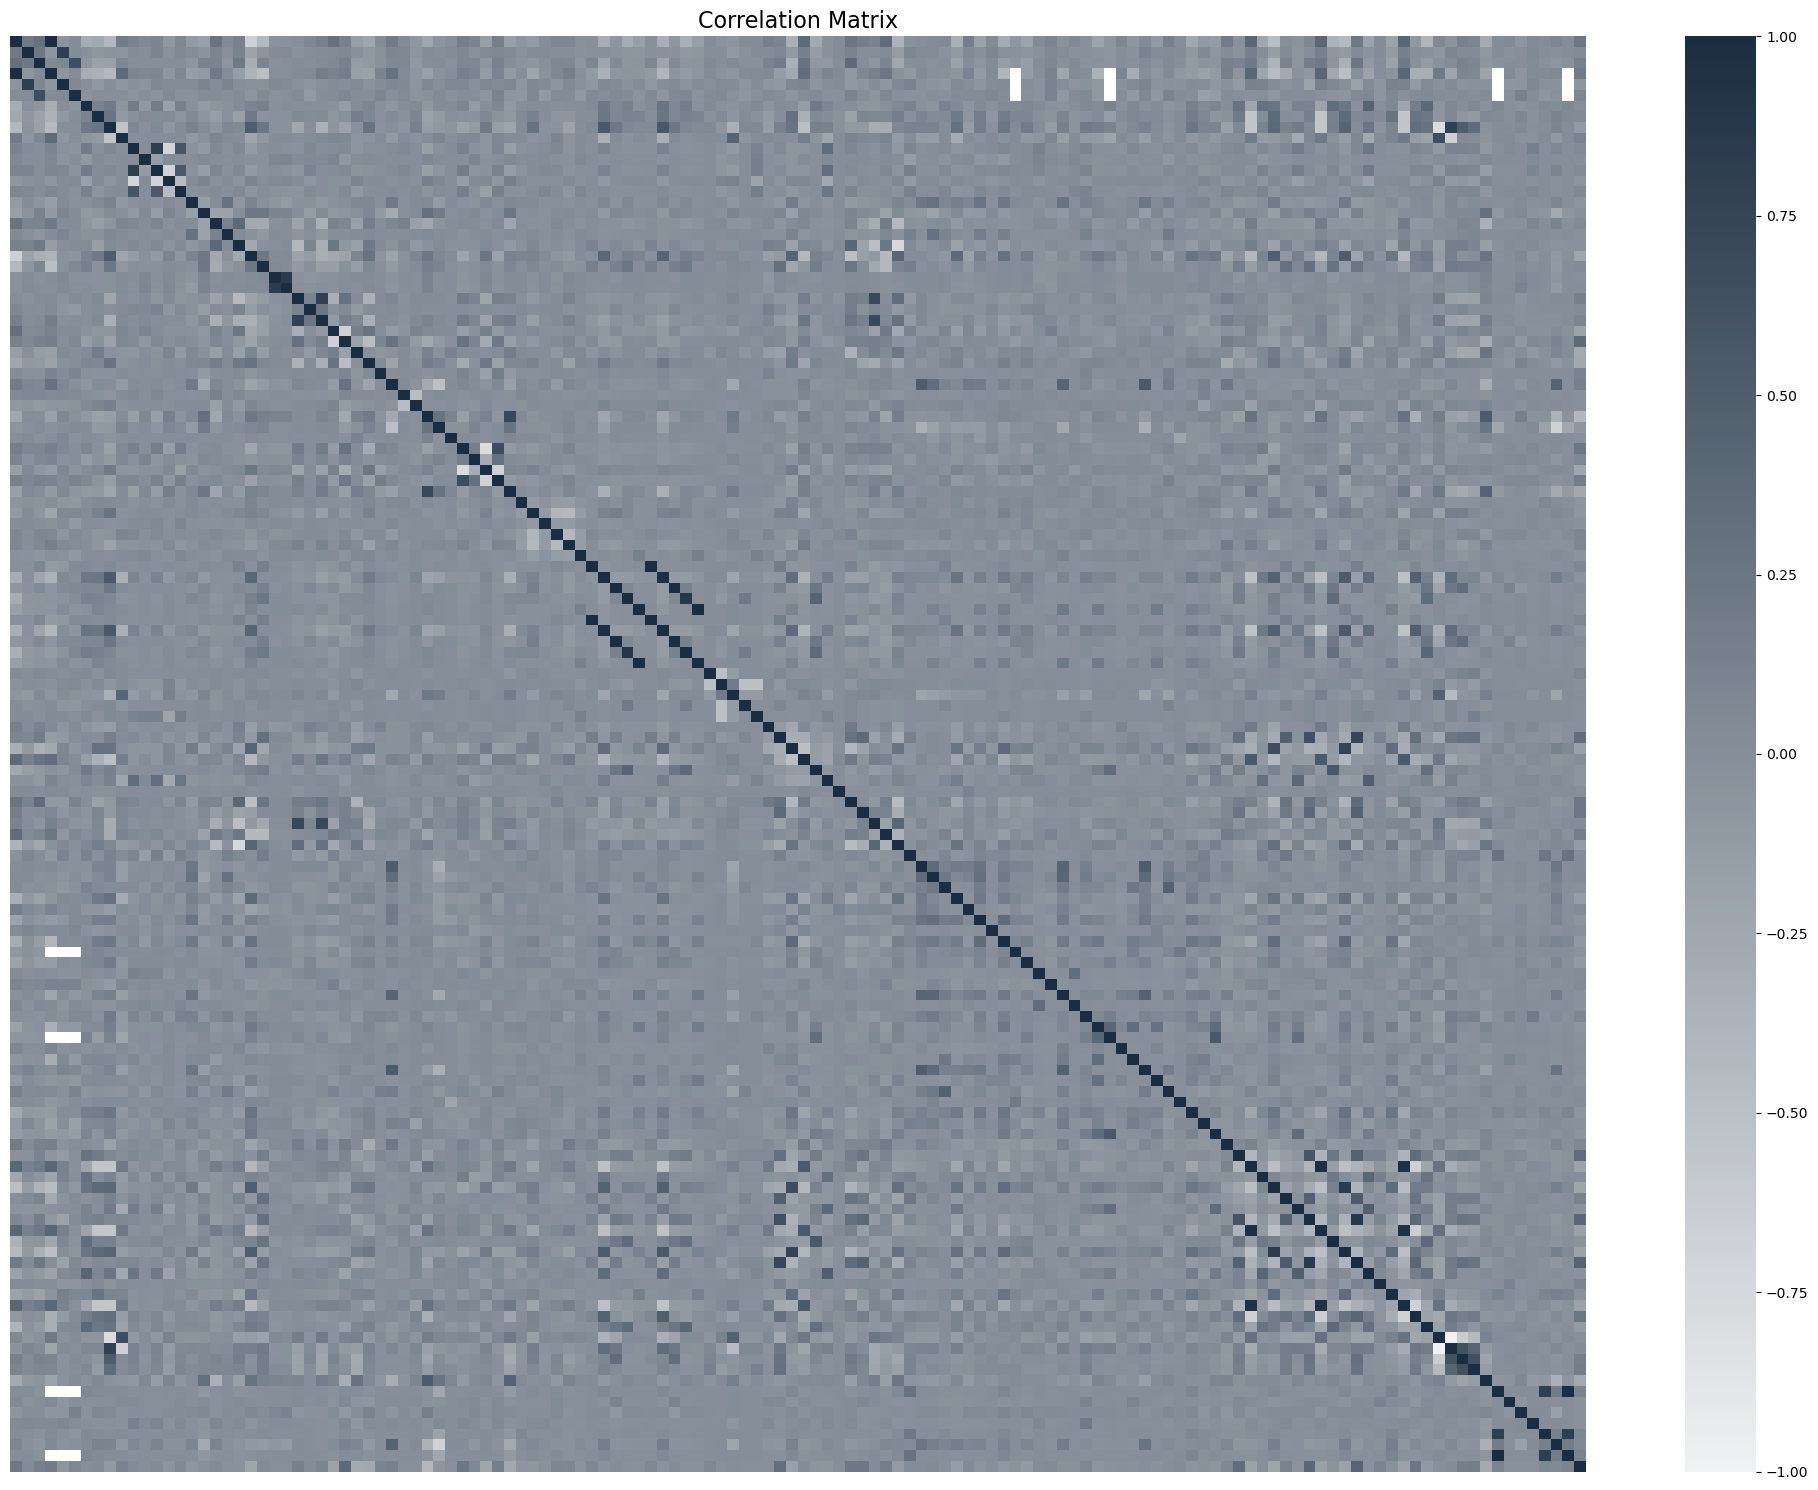

In [9146]:
plt.figure(figsize=(20, 15))

corr_matrix = df_1.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=False, cmap=denexus_palette, cbar=True, xticklabels=False, yticklabels=False)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

#### **Target: Has Disruption.**

##### División en Conjuntos de Entrenamiento y Prueba.

In [10307]:
X = df_1.drop('has_disruption', axis=1)
y = df_1['has_disruption']

In [10308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10309]:
y_train.value_counts()

False    589
True     263
Name: has_disruption, dtype: int64

In [10310]:
y_test.value_counts()

False    264
True     102
Name: has_disruption, dtype: int64

##### Entrenamiento y Evaluación de Modelos.


###### **Random Forest.**

In [10311]:
rf_model = RandomForestClassifier(
                                  random_state=42,
                                  n_estimators=100,
                                  min_samples_split=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=42)

In [10312]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.99415205, 0.97660819, 0.98823529, 0.97647059, 0.98823529])

In [10313]:
print("Train set score (Accuracy) =", rf_model.score(X_train, y_train))
print("Test set score (Accuracy) =", rf_model.score(X_test, y_test))

conf_mat = confusion_matrix(y_test, rf_model.predict(X_test))

num_classes = conf_mat.shape[0]

print(tabulate(
    conf_mat,
    headers=[f'Pred Class {i}' for i in range(num_classes)],
    showindex=[f'Real Class {i}' for i in range(num_classes)],
    tablefmt='fancy_grid'
))

print("\nClassification Report:")
print(classification_report(y_test, rf_model.predict(X_test)))

Train set score (Accuracy) = 0.9976525821596244
Test set score (Accuracy) = 0.9781420765027322
╒══════════════╤════════════════╤════════════════╕
│              │   Pred Class 0 │   Pred Class 1 │
╞══════════════╪════════════════╪════════════════╡
│ Real Class 0 │            259 │              5 │
├──────────────┼────────────────┼────────────────┤
│ Real Class 1 │              3 │             99 │
╘══════════════╧════════════════╧════════════════╛

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       264
        True       0.95      0.97      0.96       102

    accuracy                           0.98       366
   macro avg       0.97      0.98      0.97       366
weighted avg       0.98      0.98      0.98       366



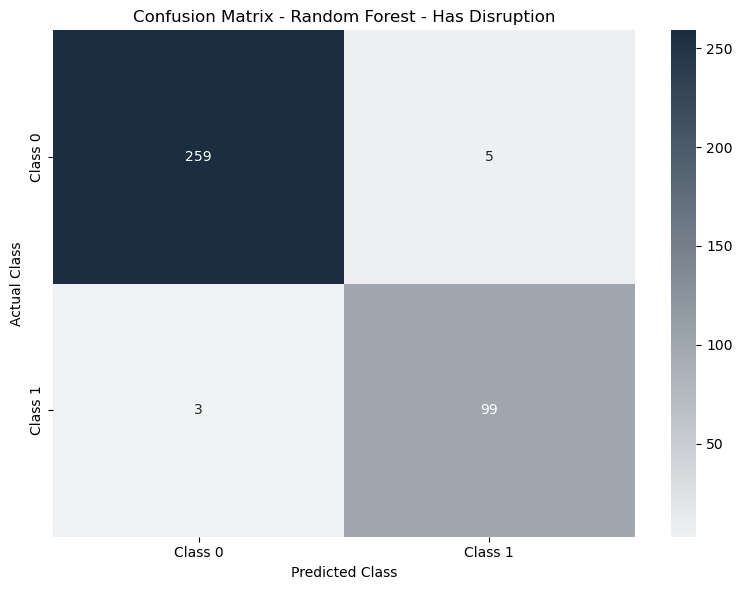

In [10314]:
class_labels = [f'Class {i}' for i in range(conf_mat.shape[0])]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=denexus_palette,
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)
plt.title('Confusion Matrix - Random Forest - Has Disruption')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "confusion-matrix_target-has-disruption_random-forest.png")
    plt.savefig(output_path)
plt.show()

###### **Decision Tree.**

In [10315]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10316]:
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([1.        , 0.95906433, 0.97647059, 0.97058824, 0.98235294])

In [10317]:
print("Train set score (Accuracy) =", dt_model.score(X_train, y_train))
print("Test set score (Accuracy) =", dt_model.score(X_test, y_test))

conf_mat = confusion_matrix(y_test, dt_model.predict(X_test))

num_classes = conf_mat.shape[0]

print(tabulate(
    conf_mat,
    headers=[f'Pred Class {i}' for i in range(num_classes)],
    showindex=[f'Real Class {i}' for i in range(num_classes)],
    tablefmt='fancy_grid'
))

print("\nClassification Report:")
print(classification_report(y_test, dt_model.predict(X_test)))

Train set score (Accuracy) = 1.0
Test set score (Accuracy) = 0.9672131147540983
╒══════════════╤════════════════╤════════════════╕
│              │   Pred Class 0 │   Pred Class 1 │
╞══════════════╪════════════════╪════════════════╡
│ Real Class 0 │            257 │              7 │
├──────────────┼────────────────┼────────────────┤
│ Real Class 1 │              5 │             97 │
╘══════════════╧════════════════╧════════════════╛

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       264
        True       0.93      0.95      0.94       102

    accuracy                           0.97       366
   macro avg       0.96      0.96      0.96       366
weighted avg       0.97      0.97      0.97       366



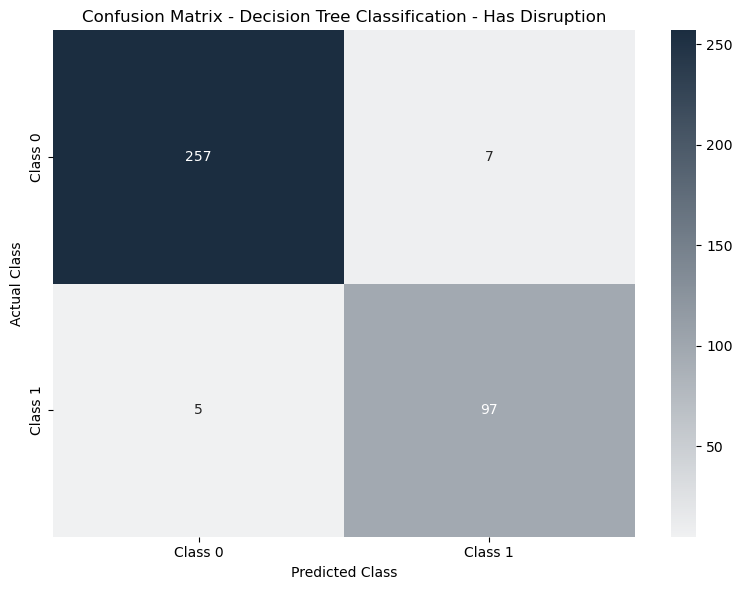

In [10318]:
class_labels = [f'Class {i}' for i in range(conf_mat.shape[0])]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=denexus_palette,
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)
plt.title('Confusion Matrix - Decision Tree Classification - Has Disruption')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "confusion-matrix_target-has-disruption_decision-tree.png")
    plt.savefig(output_path)
plt.show()

##### Curva ROC.
La curva ROC (Receiver Operating Characteristic) es una representación gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. Muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que varía el umbral de decisión del modelo.

Un modelo perfecto tendrá una curva que pase cerca del vértice superior izquierdo (FPR=0, TPR=1), indicando un rendimiento ideal. El área bajo la curva (AUC - Area Under the Curve) resume en un único valor qué tan bien el modelo discrimina entre las dos clases, donde un valor de 1 indica un modelo perfecto y 0.5 sugiere un rendimiento aleatorio.

In [10319]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [10320]:
# Calcular FPR, TPR y el AUC.
## Random Forest.
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

## Decision Tree.
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

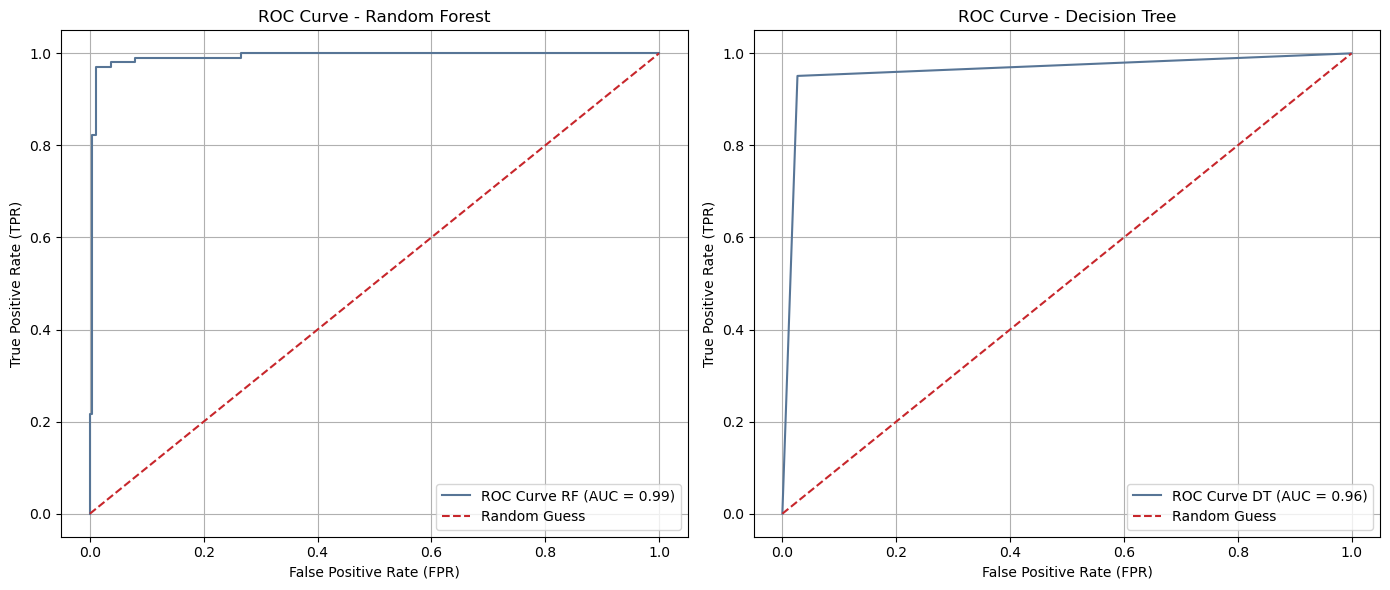

In [10321]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

## Subplot para Random Forest.
axs[0].plot(fpr_rf, tpr_rf, label=f'ROC Curve RF (AUC = {roc_auc_rf:.2f})', color=denexus_colors[1])
axs[0].plot([0, 1], [0, 1], color=denexus_colors[2], linestyle='--', label='Random Guess')
axs[0].set_title('ROC Curve - Random Forest')
axs[0].set_xlabel('False Positive Rate (FPR)')
axs[0].set_ylabel('True Positive Rate (TPR)')
axs[0].legend(loc='lower right')
axs[0].grid(True)

## Subplot para Decision Tree.
axs[1].plot(fpr_dt, tpr_dt, color=denexus_colors[1], label=f'ROC Curve DT (AUC = {roc_auc_dt:.2f})')
axs[1].plot([0, 1], [0, 1], color=denexus_colors[2], linestyle='--', label='Random Guess')
axs[1].set_title('ROC Curve - Decision Tree')
axs[1].set_xlabel('False Positive Rate (FPR)')
axs[1].set_ylabel('True Positive Rate (TPR)')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "ROC-curve.png")
    plt.savefig(output_path)
plt.show()

##### Resultados.

In [10322]:
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [10323]:
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')

In [10324]:
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')

In [10325]:
results['Model'] = ['RandomForest', 'DecisionTree']
results['Accuracy'] = [rf_precision, dt_precision]
results['Recall'] = [rf_recall, dt_recall]
results['Tipo'] = ['Binary']*2
results['Target'] = ['Has Disruption']*2

In [10326]:
results

,Target,Model,Tipo,Accuracy,Recall
0,Has Disruption,RandomForest,Binary,0.978342,0.978142
1,Has Disruption,DecisionTree,Binary,0.967477,0.967213


#### **Target: Data Theft.**

##### División en Conjuntos de Entrenamiento y Prueba.

In [10327]:
X = df_1.drop('data_theft_encoded', axis=1)
y = df_1['data_theft_encoded']

In [10328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10329]:
y_train.value_counts()

1    322
2    319
3    153
0     58
Name: data_theft_encoded, dtype: int64

In [10330]:
y_test.value_counts()

2    151
1    139
3     57
0     19
Name: data_theft_encoded, dtype: int64

##### Entrenamiento y Evaluación de Modelos.


###### **Random Forest.**

In [10331]:
rf_model = RandomForestClassifier(
                                  random_state=42,
                                  n_estimators=100,
                                  min_samples_split=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=42)

In [10332]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.95906433, 0.97660819, 0.97647059, 0.94117647, 0.97058824])

In [10333]:
print("Train set score (Accuracy) =", rf_model.score(X_train, y_train))
print("Test set score (Accuracy) =", rf_model.score(X_test, y_test))

inverse_mapping = {v: k for k, v in mapping_target_data_theft.items()}
mapped_class_labels = [inverse_mapping[i] for i in range(len(mapping_target_data_theft))]

# Generar la matriz de confusión
conf_mat = confusion_matrix(y_test, rf_model.predict(X_test))
print(tabulate(
    conf_mat,
    headers=[f'Pred: {label}' for label in mapped_class_labels],
    showindex=[f'Real: {label}' for label in mapped_class_labels],
    tablefmt='fancy_grid'
))
print("\nClassification Report:")
print(classification_report(y_test, rf_model.predict(X_test), target_names=mapped_class_labels))

Train set score (Accuracy) = 1.0
Test set score (Accuracy) = 0.9781420765027322
╒══════════════════════════╤═════════════════╤════════════════════════════╤═══════════════════════╤════════════════════════╕
│                          │   Pred: No Data │   Pred: Non-Sensitive Info │   Pred: Not Available │   Pred: Sensitive Info │
╞══════════════════════════╪═════════════════╪════════════════════════════╪═══════════════════════╪════════════════════════╡
│ Real: No Data            │              18 │                          0 │                     1 │                      0 │
├──────────────────────────┼─────────────────┼────────────────────────────┼───────────────────────┼────────────────────────┤
│ Real: Non-Sensitive Info │               2 │                        137 │                     0 │                      0 │
├──────────────────────────┼─────────────────┼────────────────────────────┼───────────────────────┼────────────────────────┤
│ Real: Not Available      │               0 

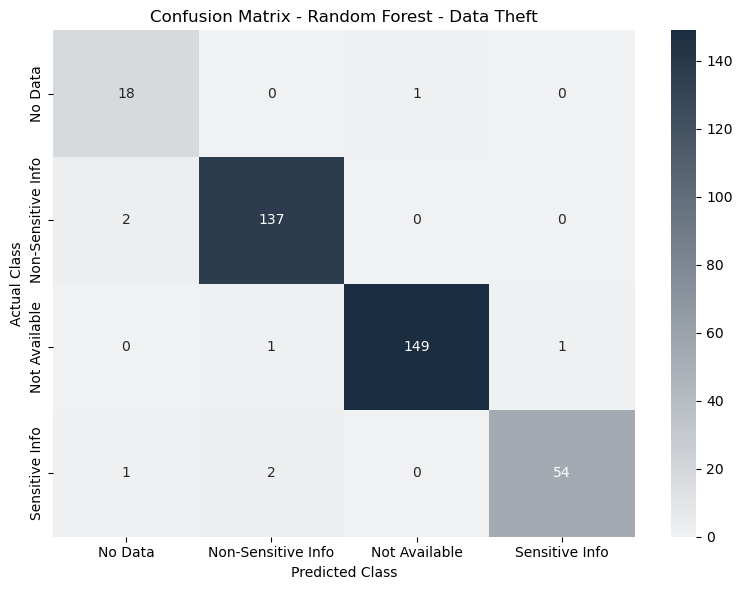

In [10334]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=denexus_palette,
            xticklabels=mapped_class_labels, yticklabels=mapped_class_labels, cbar=True)
plt.title('Confusion Matrix - Random Forest - Data Theft')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()

# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "confusion-matrix_target-data-theft_random-forest.png")
    plt.savefig(output_path)

plt.show()

###### **Decision Tree.**

In [10335]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10336]:
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.94152047, 0.97660819, 0.95294118, 0.95294118, 0.96470588])

In [10337]:
print("Train set score (Accuracy) =", dt_model.score(X_train, y_train))
print("Test set score (Accuracy) =", dt_model.score(X_test, y_test))

inverse_mapping = {v: k for k, v in mapping_target_data_theft.items()}
mapped_class_labels = [inverse_mapping[i] for i in range(len(mapping_target_data_theft))]

# Generar la matriz de confusión
conf_mat = confusion_matrix(y_test, dt_model.predict(X_test))
print(tabulate(
    conf_mat,
    headers=[f'Pred: {label}' for label in mapped_class_labels],
    showindex=[f'Real: {label}' for label in mapped_class_labels],
    tablefmt='fancy_grid'
))
print("\nClassification Report:")
print(classification_report(y_test, dt_model.predict(X_test), target_names=mapped_class_labels))

Train set score (Accuracy) = 1.0
Test set score (Accuracy) = 0.9754098360655737
╒══════════════════════════╤═════════════════╤════════════════════════════╤═══════════════════════╤════════════════════════╕
│                          │   Pred: No Data │   Pred: Non-Sensitive Info │   Pred: Not Available │   Pred: Sensitive Info │
╞══════════════════════════╪═════════════════╪════════════════════════════╪═══════════════════════╪════════════════════════╡
│ Real: No Data            │              14 │                          0 │                     5 │                      0 │
├──────────────────────────┼─────────────────┼────────────────────────────┼───────────────────────┼────────────────────────┤
│ Real: Non-Sensitive Info │               0 │                        138 │                     0 │                      1 │
├──────────────────────────┼─────────────────┼────────────────────────────┼───────────────────────┼────────────────────────┤
│ Real: Not Available      │               0 

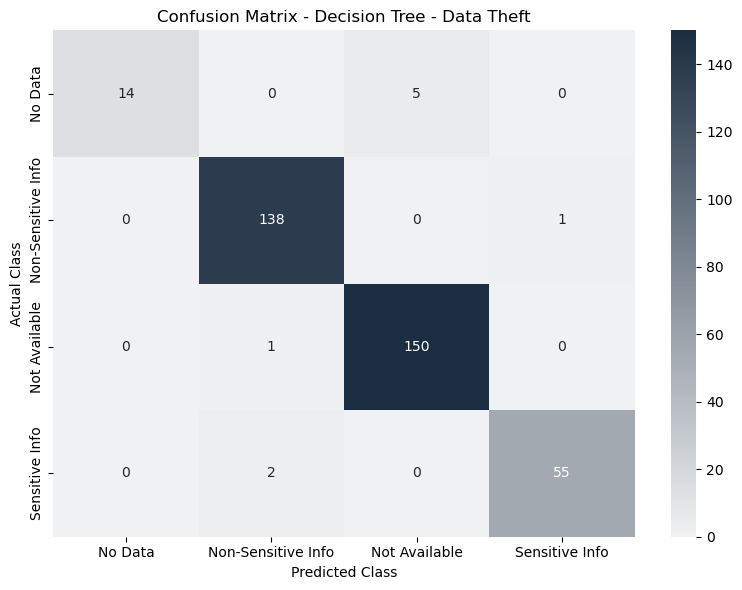

In [10338]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=denexus_palette,
            xticklabels=mapped_class_labels, yticklabels=mapped_class_labels, cbar=True)
plt.title('Confusion Matrix - Decision Tree - Data Theft')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()

# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "confusion-matrix_target-data-theft_decision-tree.png")
    plt.savefig(output_path)

plt.show()

##### Resultados.

In [10339]:
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [10340]:
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')

In [10341]:
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')

In [10342]:
new_rows = pd.DataFrame({
    'Model': ['RandomForest', 'DecisionTree'],
    'Accuracy': [rf_precision, dt_precision],
    'Recall': [rf_recall, dt_recall],
    'Tipo': ['Label Encoder'] * 2,
    'Target': ['Data Theft'] * 2
})
results = pd.concat([results, new_rows], ignore_index=True)

In [10343]:
results

,Target,Model,Tipo,Accuracy,Recall
0,Has Disruption,RandomForest,Binary,0.978342,0.978142
1,Has Disruption,DecisionTree,Binary,0.967477,0.967213
2,Data Theft,RandomForest,Label Encoder,0.978864,0.978142
3,Data Theft,DecisionTree,Label Encoder,0.975830,0.975410
